In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
# Configurations

n_3b = 250000
n_all4b = 250000
seed = 62

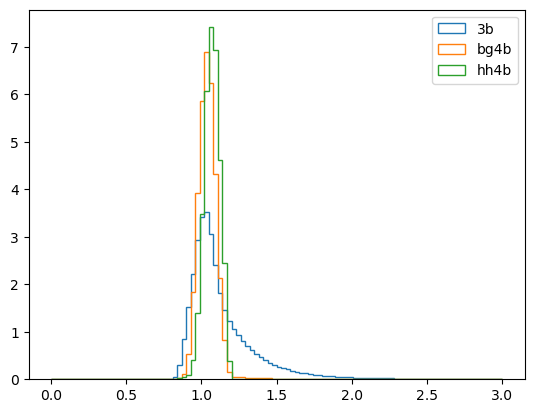

In [9]:
import pathlib
import pandas as pd
import matplotlib.pyplot as plt

directory = pathlib.Path("../events/MG3")
df_3b = pd.read_hdf(directory / "dataframes" / "threeTag_picoAOD.h5")
df_bg4b = pd.read_hdf(directory / "dataframes" / "fourTag_10x_picoAOD.h5")
df_signal = pd.read_hdf(directory / "dataframes" / "HH4b_picoAOD.h5")

plt.hist(df_3b["weight"], histtype="step", bins=100, range=(0, 3), label="3b", density=True)
plt.hist(df_bg4b["weight"], histtype="step", bins=100, range=(0, 3), label="bg4b", density=True)
plt.hist(df_signal["weight"], histtype="step", bins=100, range=(0, 3), label="hh4b", density=True)
plt.legend()
plt.show()
plt.close()

Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42


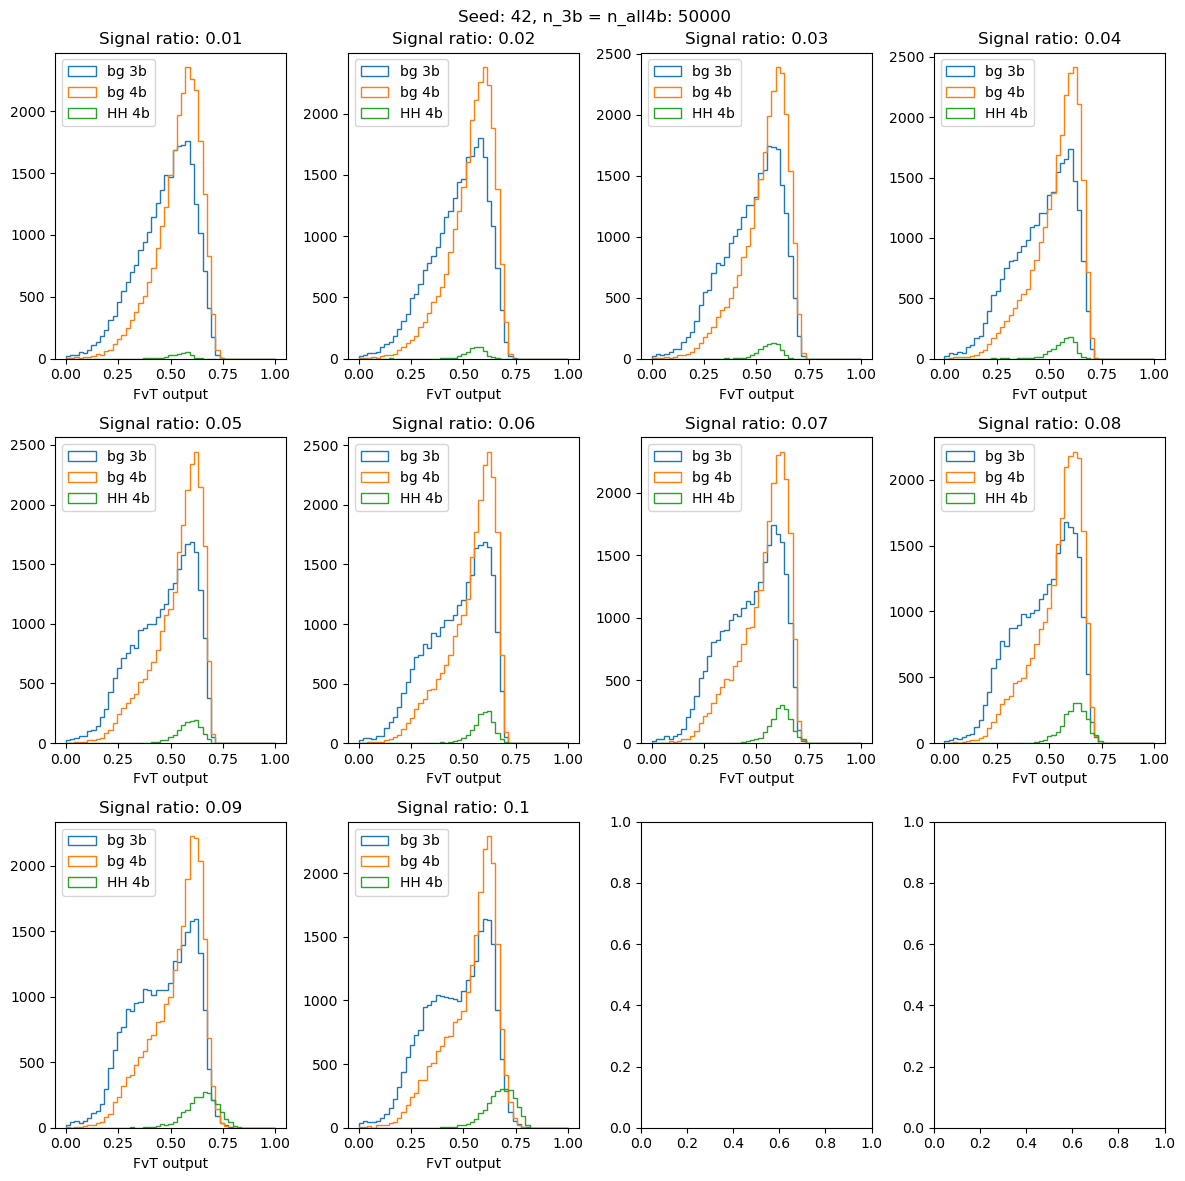

Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42


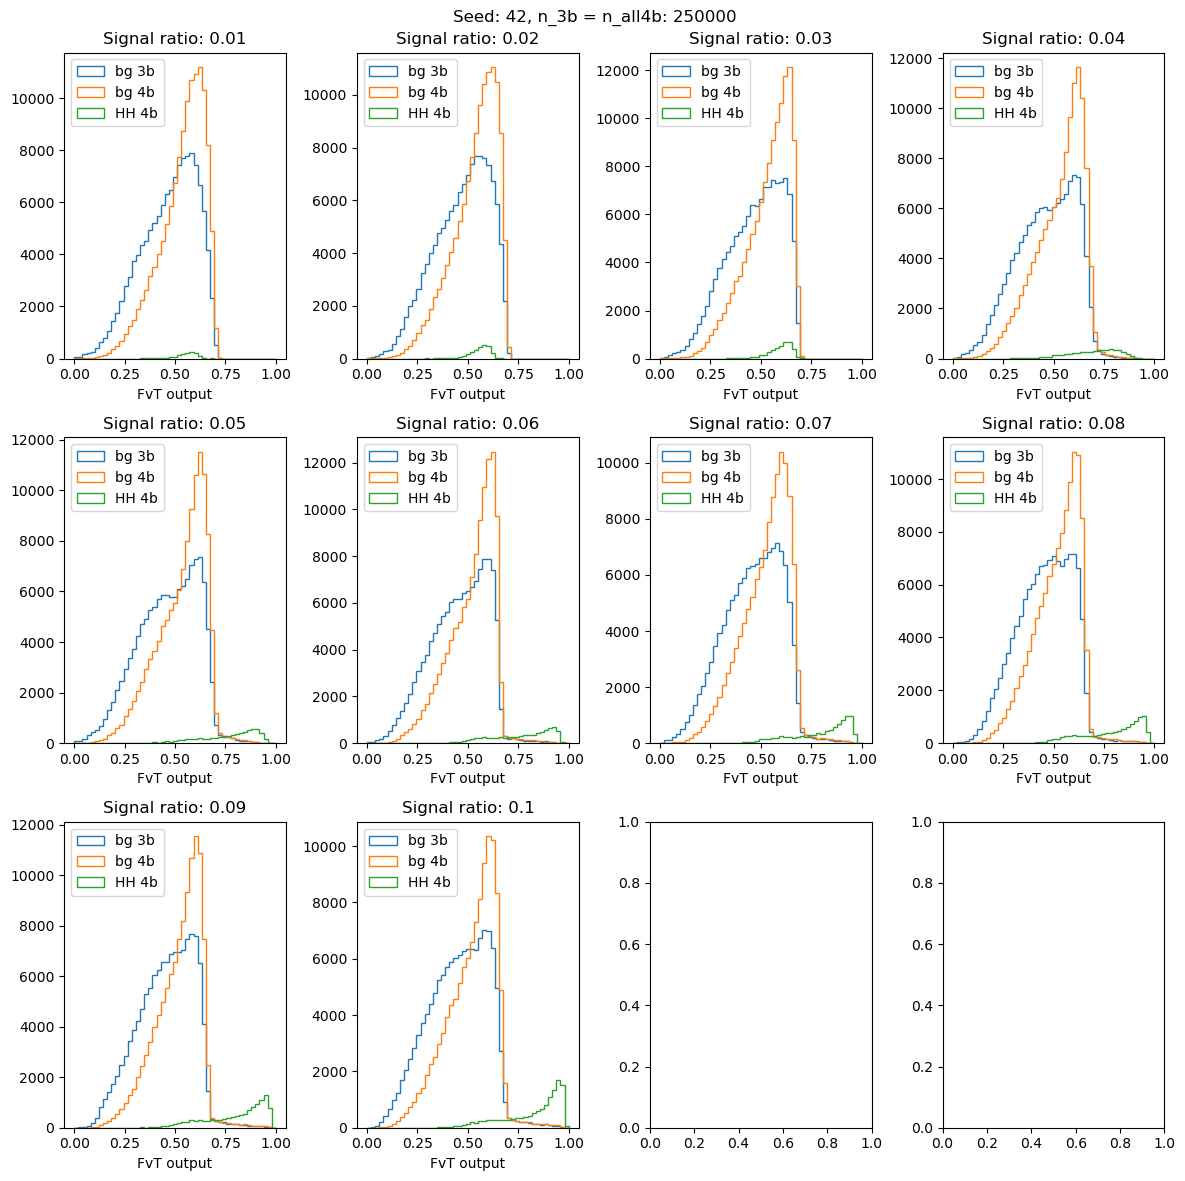

Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52


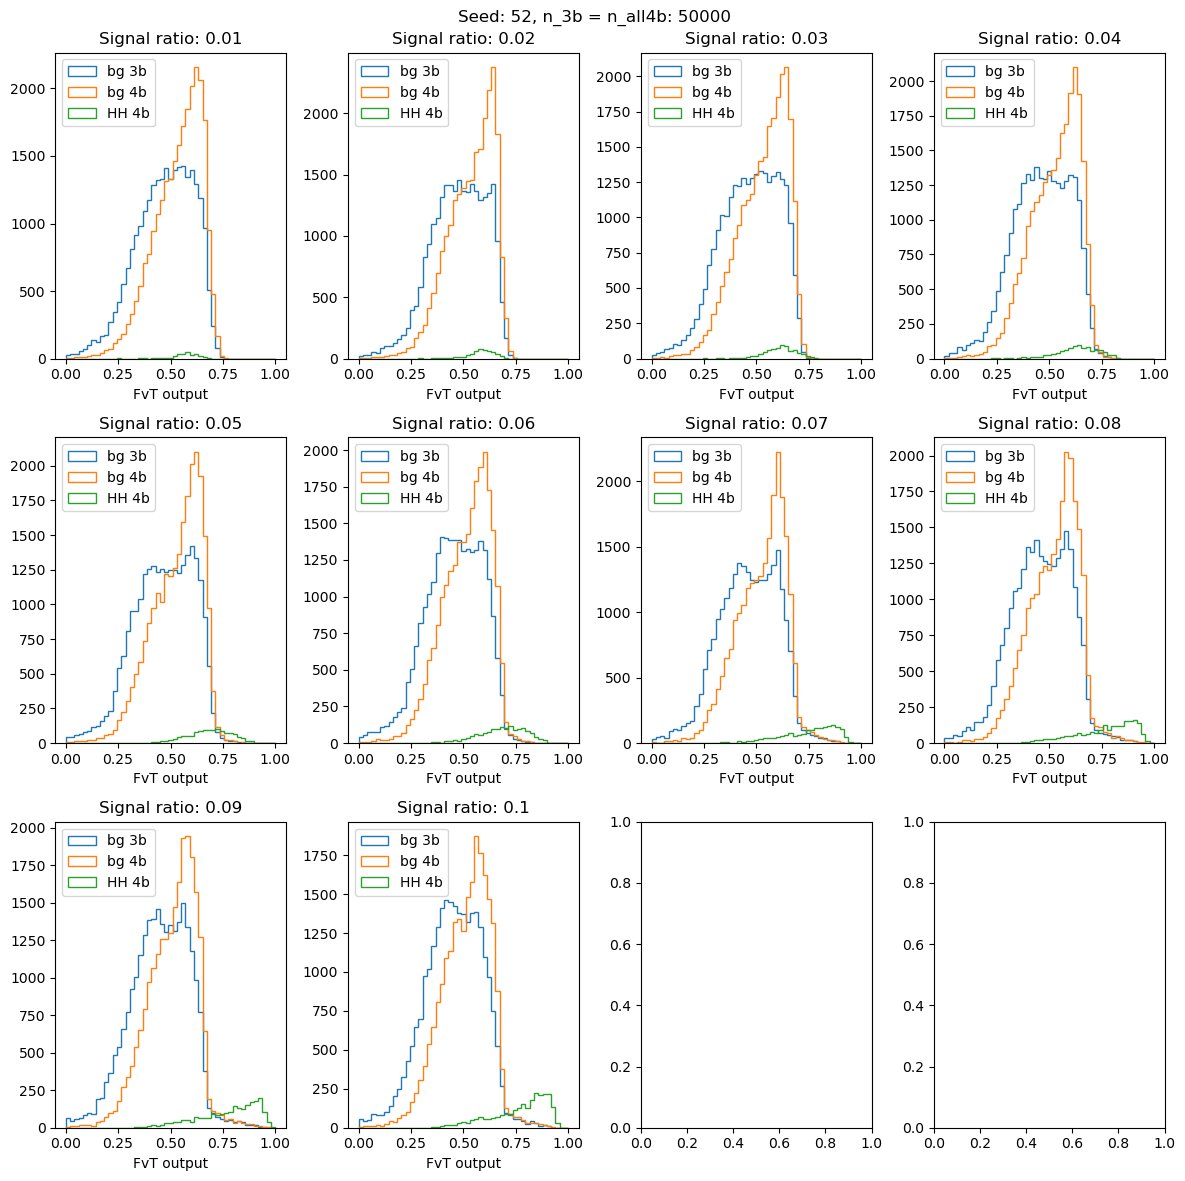

Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52


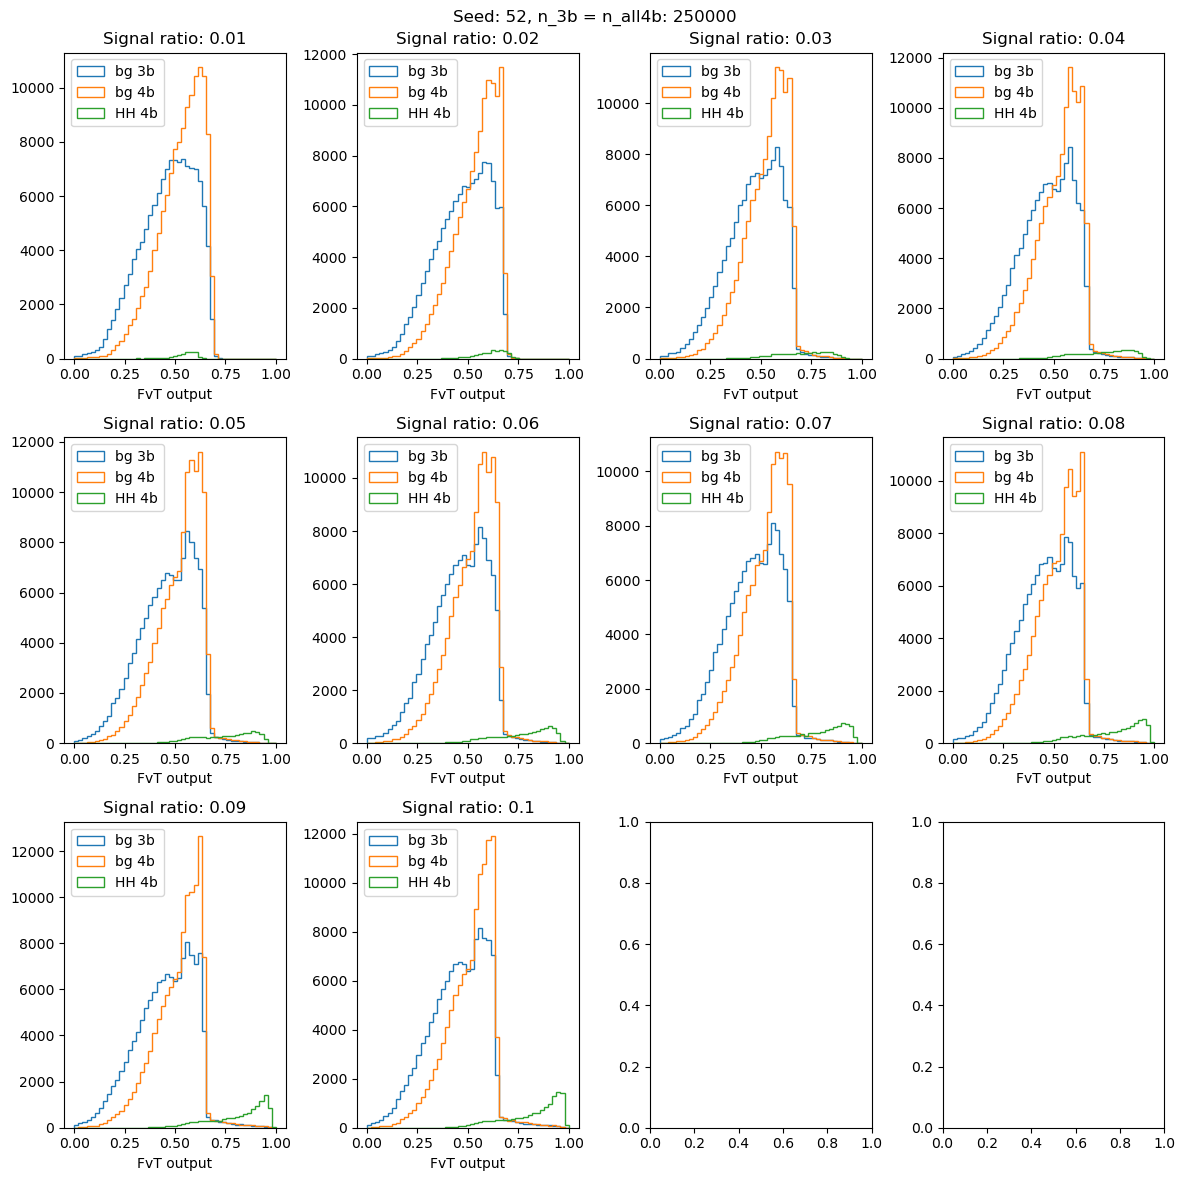

Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62


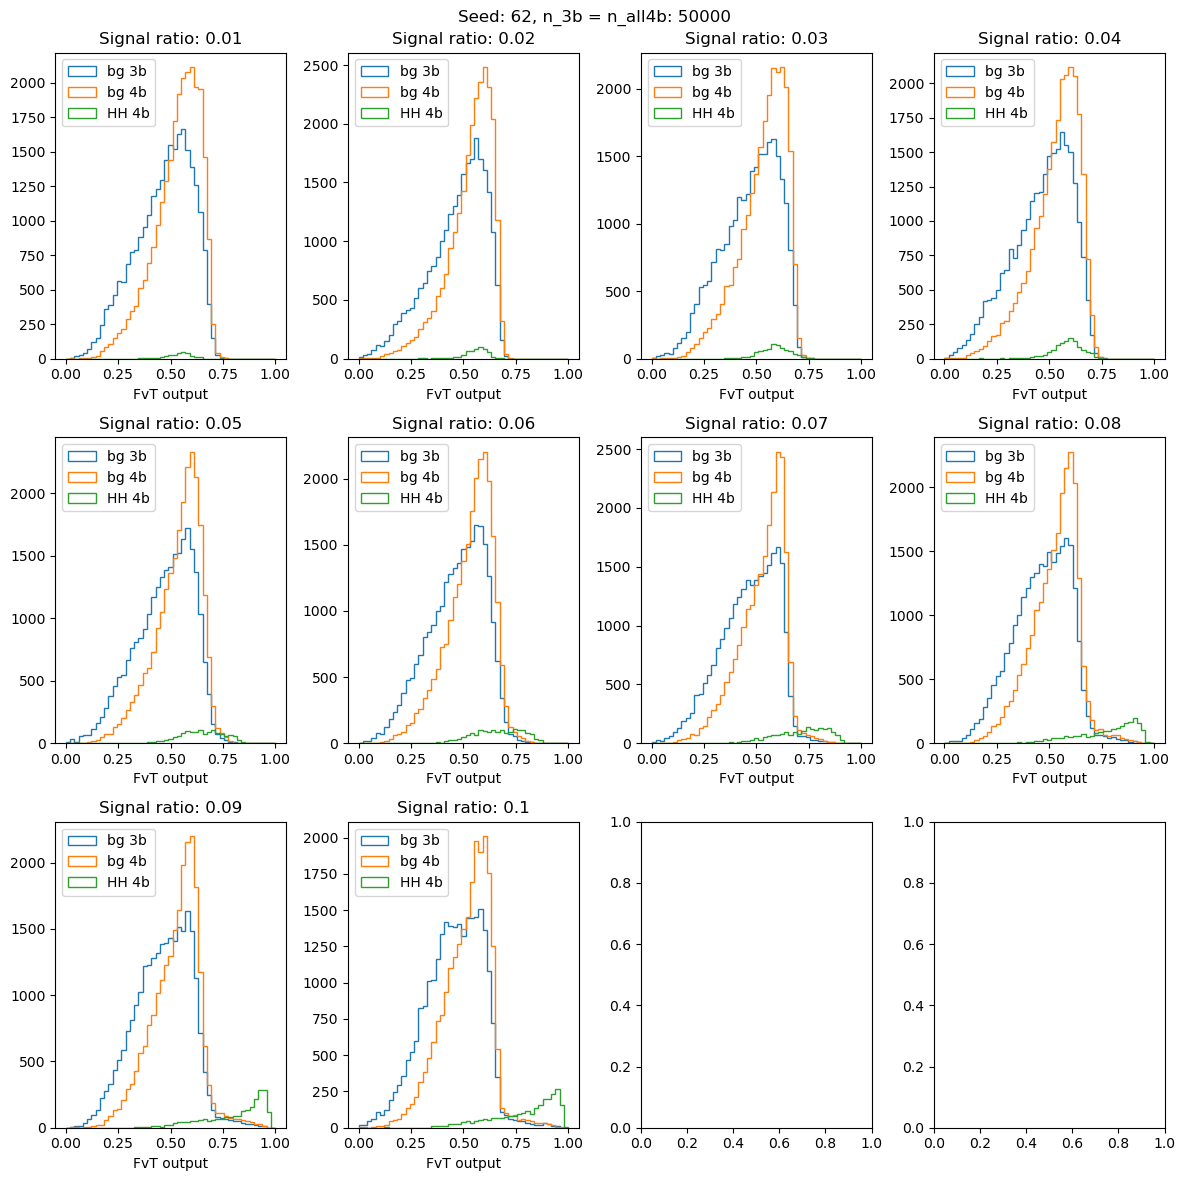

Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62


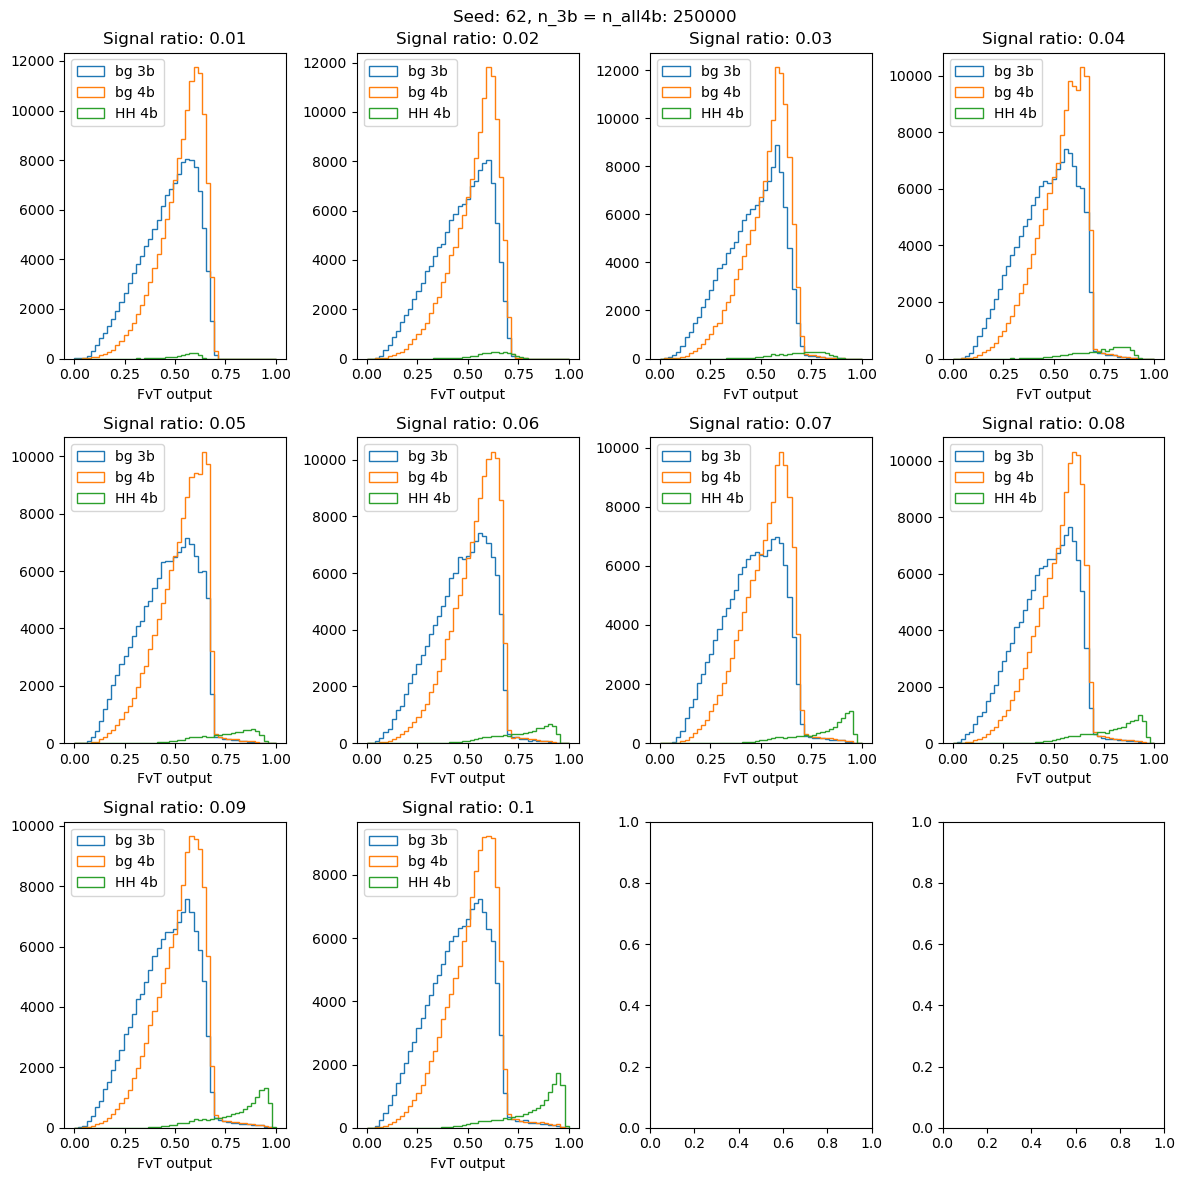

Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72


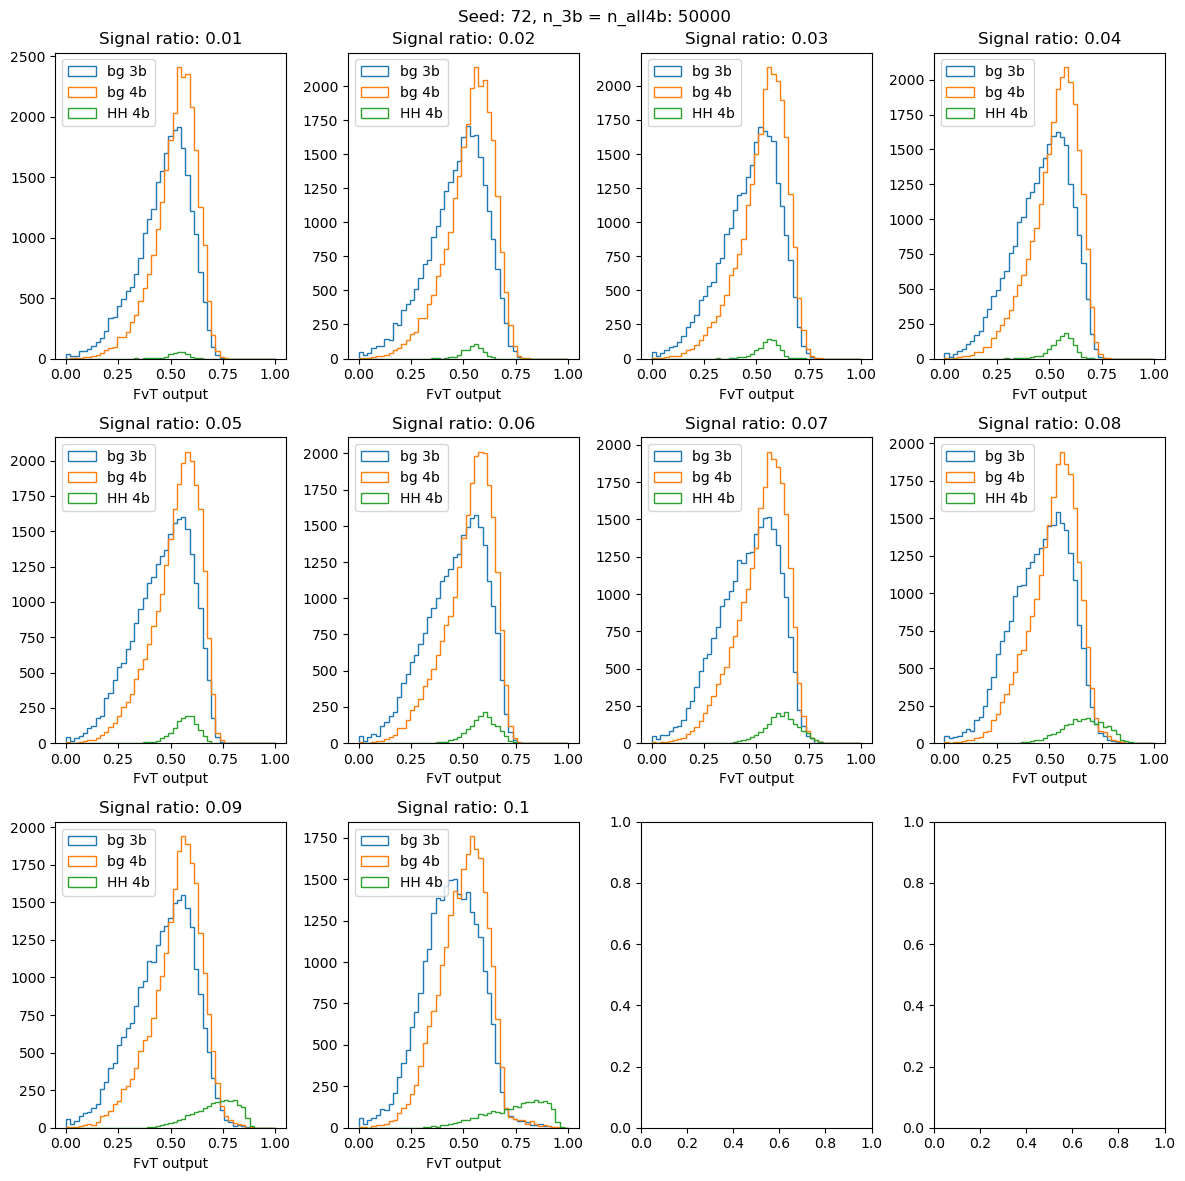

Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72


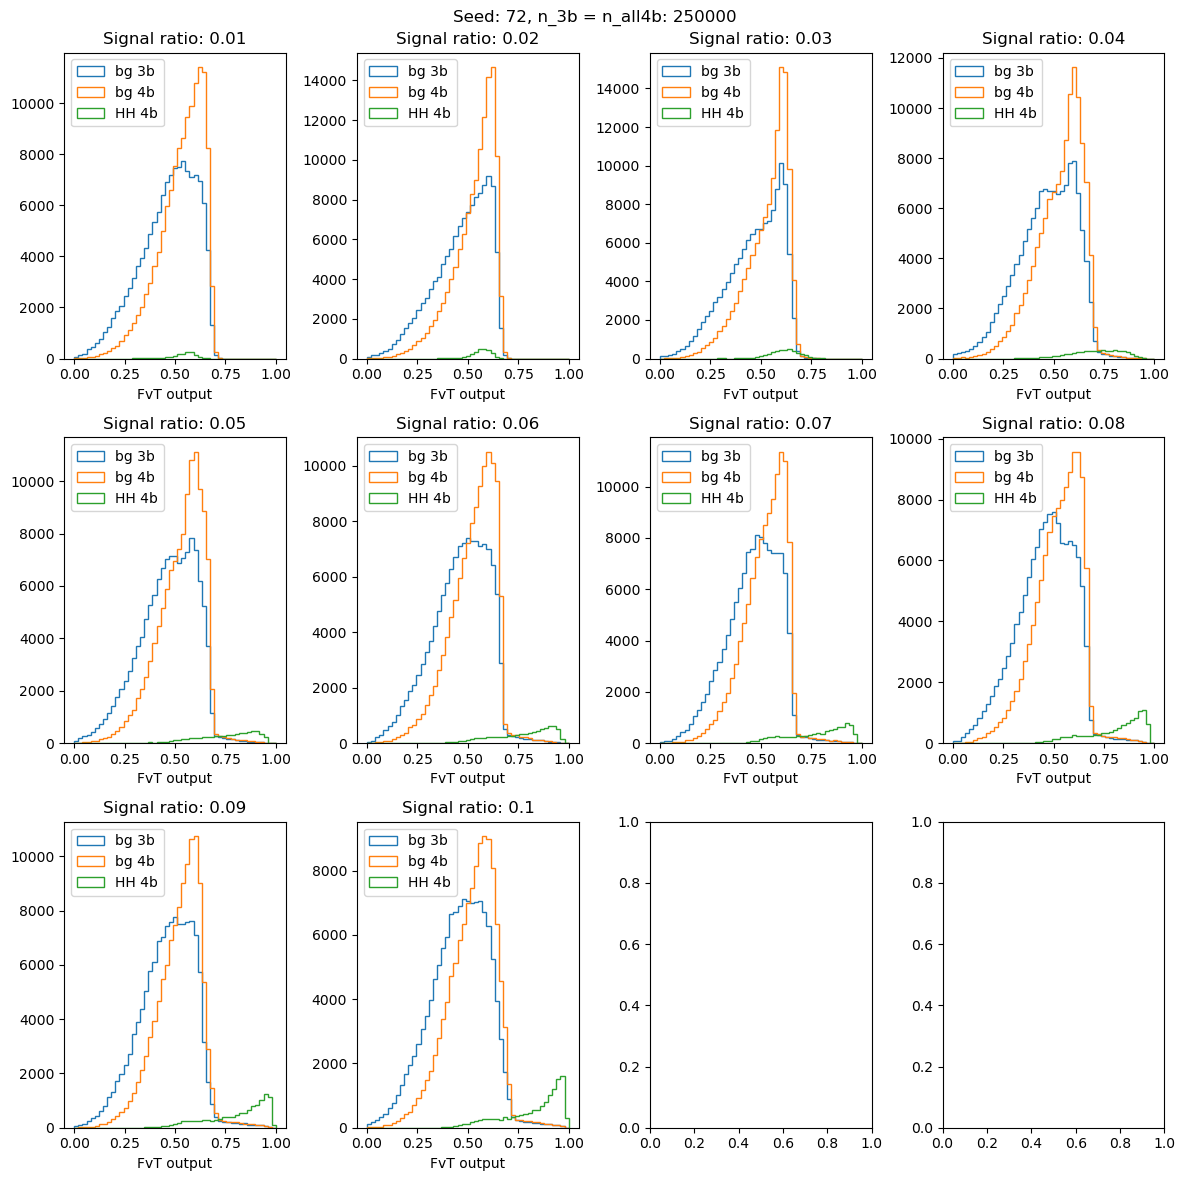

Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82


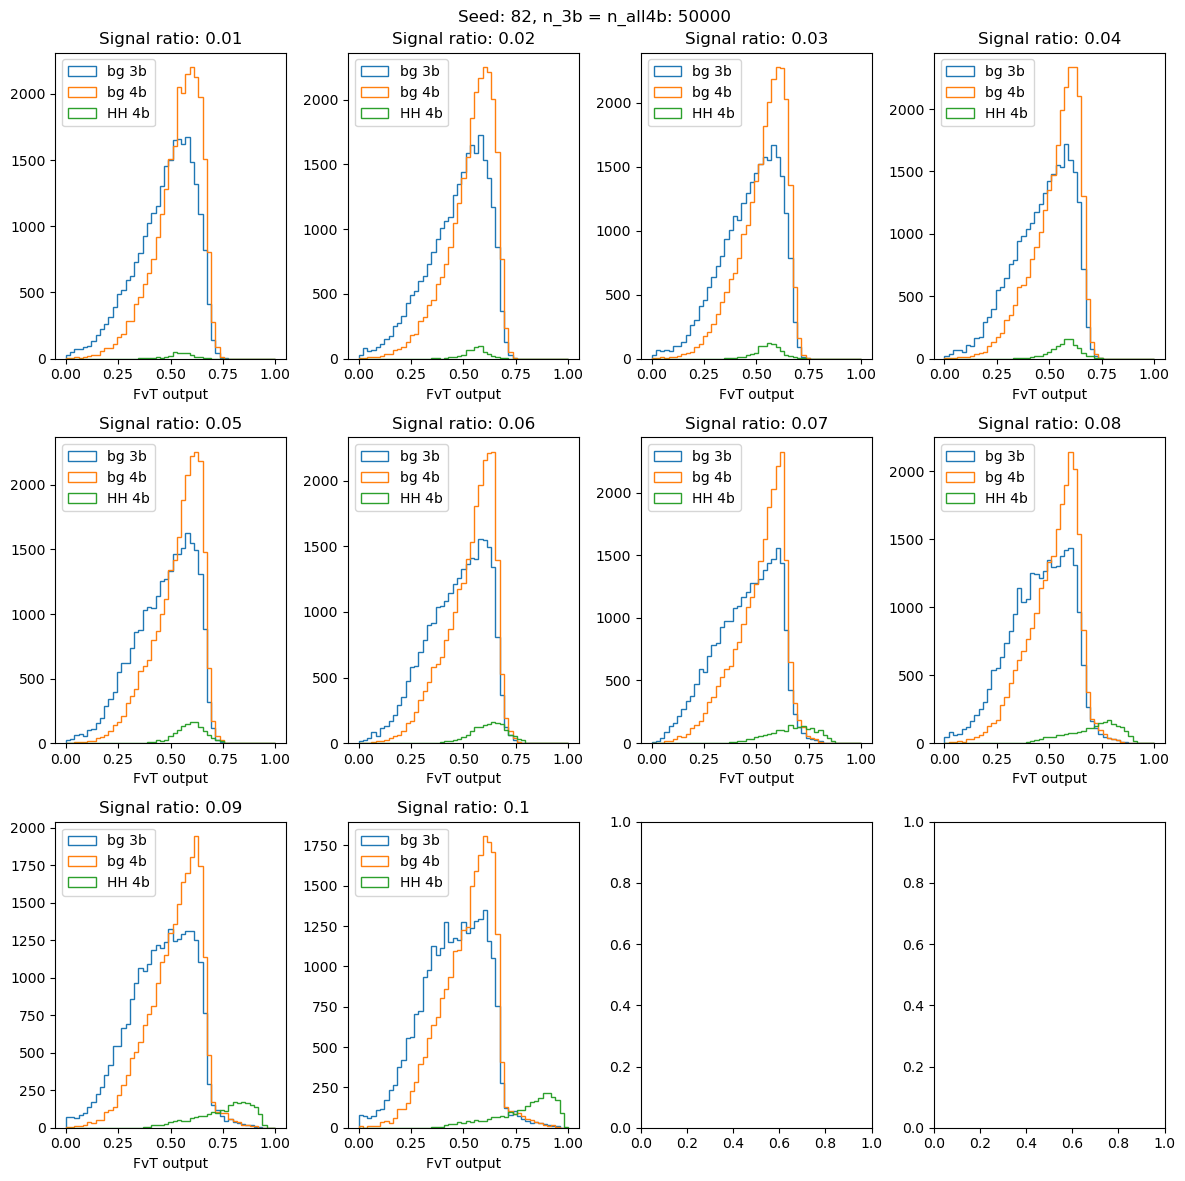

Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82


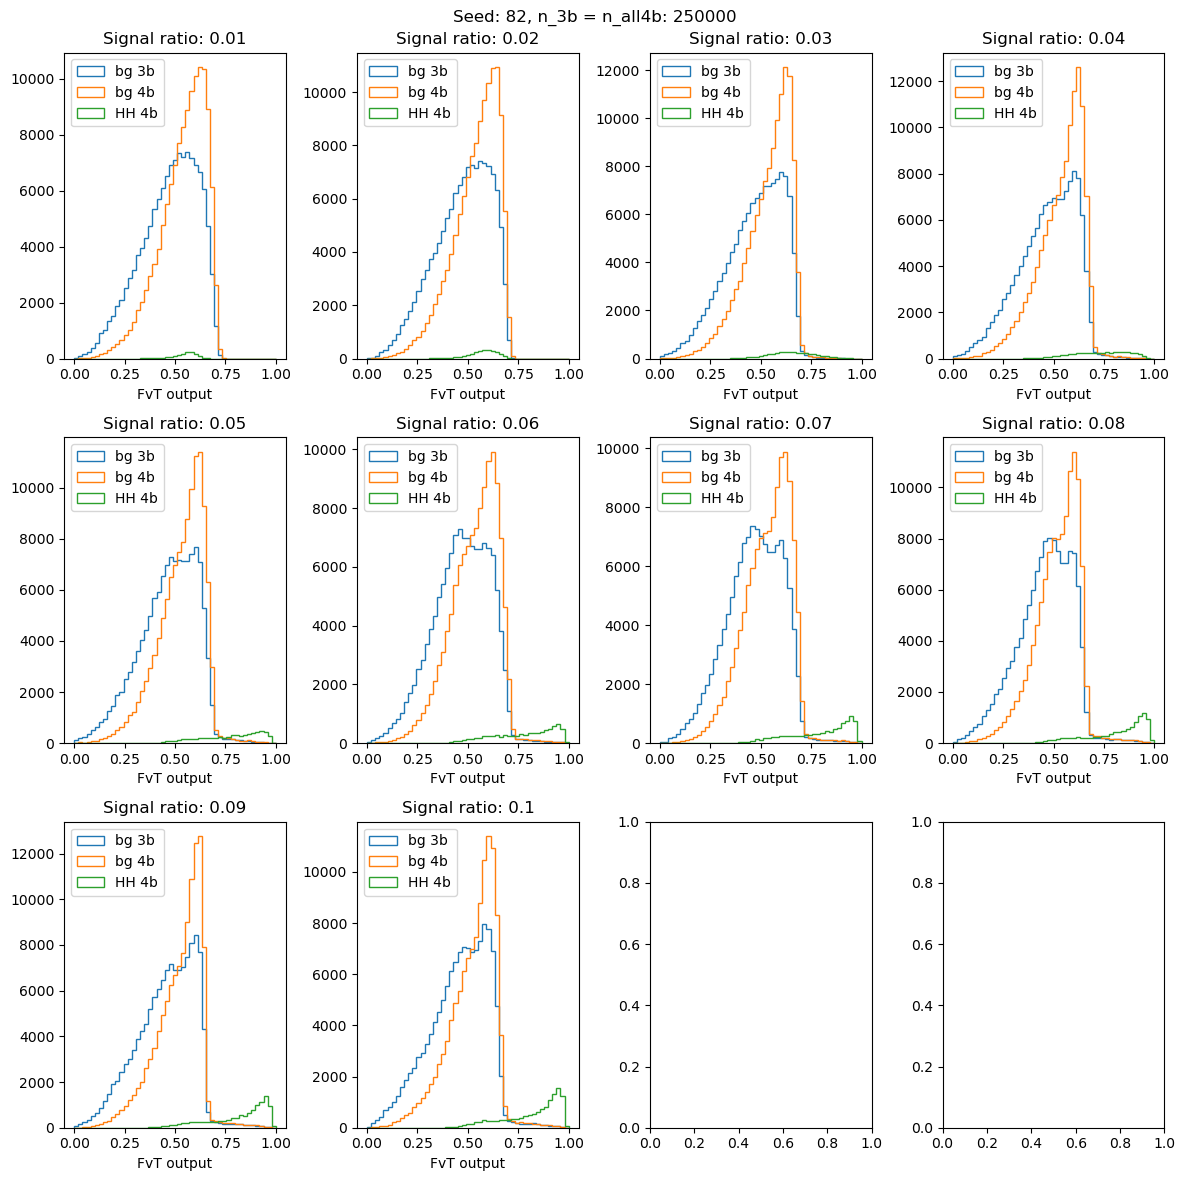

Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92


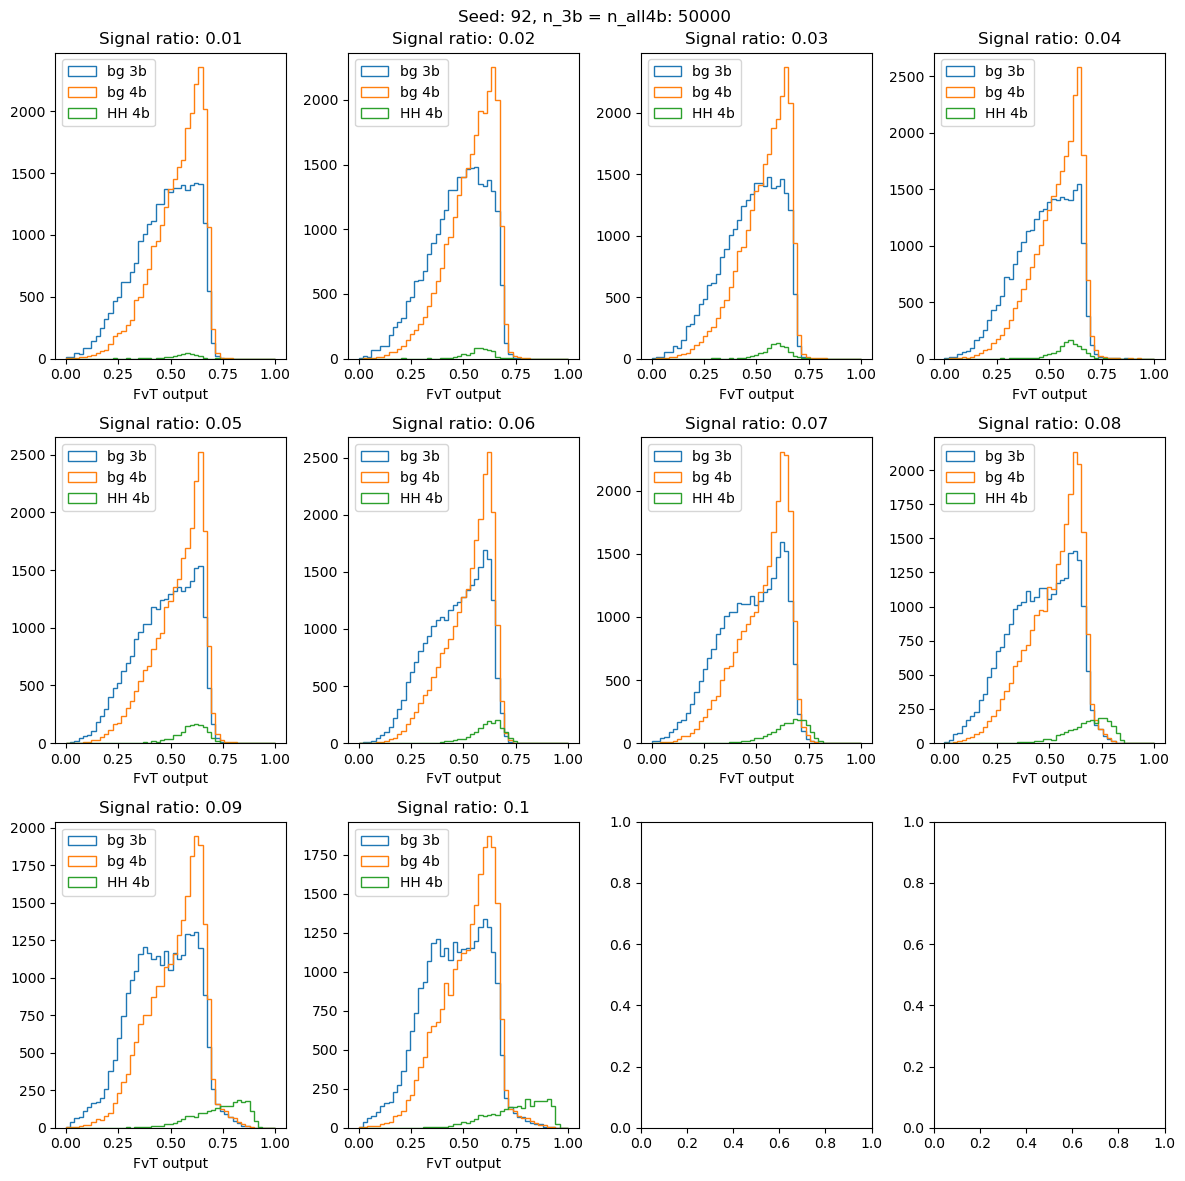

Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92


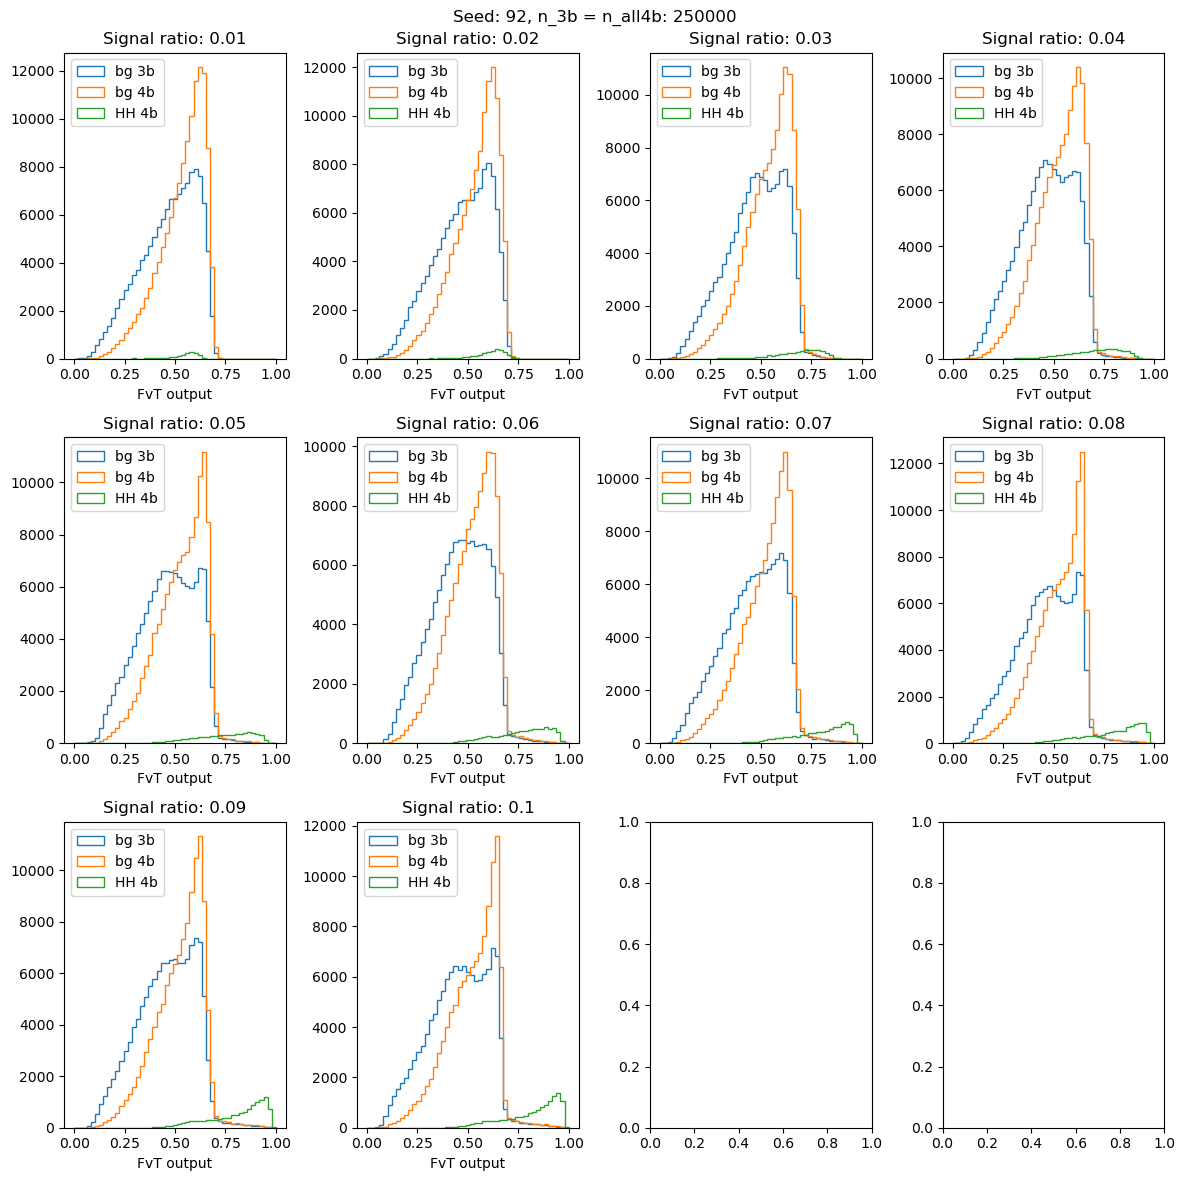

In [6]:
import pathlib
import pandas as pd
import numpy as np
import pytorch_lightning as pl
import torch
import matplotlib.pyplot as plt

from events_data import EventsData

directory = pathlib.Path("../events/MG3")
df_3b = pd.read_hdf(directory / "dataframes" / "threeTag_picoAOD.h5")
df_3b = df_3b.sample(frac=1, random_state=seed).reset_index(drop=True)
df_3b = df_3b.iloc[:n_3b]

df_bg4b = pd.read_hdf(directory / "dataframes" / "fourTag_10x_picoAOD.h5")
df_bg4b = df_bg4b.sample(frac=1, random_state=seed).reset_index(drop=True)
df_bg4b = df_bg4b.iloc[:n_all4b]

df_signal = pd.read_hdf(directory / "dataframes" / "HH4b_picoAOD.h5")
df_signal = df_signal.sample(frac=1, random_state=seed).reset_index(drop=True)
df_signal = df_signal.iloc[:n_all4b]

df_3b["signal"] = False
df_bg4b["signal"] = False
df_signal["signal"] = True

print("3b-jet events: ", len(df_3b))
print("4b-jet events: ", len(df_bg4b))
print("HH4b-jet events: ", len(df_signal))


features = [
    "sym_Jet0_pt",
    "sym_Jet1_pt",
    "sym_Jet2_pt",
    "sym_Jet3_pt",
    "sym_Jet0_eta",
    "sym_Jet1_eta",
    "sym_Jet2_eta",
    "sym_Jet3_eta",
    "sym_Jet0_phi",
    "sym_Jet1_phi",
    "sym_Jet2_phi",
    "sym_Jet3_phi",
    "sym_Jet0_m",
    "sym_Jet1_m",
    "sym_Jet2_m",
    "sym_Jet3_m",
]

3b-jet events:  250000
4b-jet events:  250000
HH4b-jet events:  30856


In [7]:
signal_ratio = 0.01
four_tag_ratio = 0.5
dim_dijet_features = 6
dim_quadjet_features = 6
max_epochs = 50
batch_size = 1024
val_ratio = 0.33
test_ratio = 0.5

In [8]:
pl.seed_everything(seed)
np.random.seed(seed)

events_3b = EventsData.from_dataframe(df_3b, features)
events_3b.shuffle(seed=seed)

events_bg4b = EventsData.from_dataframe(df_bg4b, features)
events_bg4b.shuffle(seed=seed)
events_bg4b.trim(n_all4b - int(n_all4b * signal_ratio))

events_signal = EventsData.from_dataframe(df_signal, features)
events_signal.shuffle(seed=seed)
events_signal.trim(int(n_all4b * signal_ratio))

# set weight ratio to be exactly signal ratio
new_hh4b_weights = (
    (signal_ratio / (1 - signal_ratio))
    * (events_bg4b.total_weight / events_signal.total_weight)
    * events_signal.weights
)
events_signal.reweight(new_hh4b_weights)

# set four tag ratio to be exactly four_tag_ratio

new_3b_weights = (
    (four_tag_ratio / (1 - four_tag_ratio))
    * (
        (events_bg4b.total_weight + events_signal.total_weight)
        / events_3b.total_weight
    )
    * events_3b.weights
)
events_3b.reweight(new_3b_weights)

events_train = EventsData.merge([events_3b, events_bg4b, events_signal])

# reduce number of 4b samples to 1/8
print(
    "4b ratio: ",
    events_train.total_weight_4b / events_train.total_weight,
)
print(
    "Signal ratio: ",
    events_train.total_weight_signal / events_train.total_weight_4b,
)

print(len(events_train))
events_train.shuffle(seed=seed)
events_train, events_test = events_train.split(
    1 - test_ratio, name_1="fvt_train", name_2="fvt_test", seed=seed
)
print(len(events_train))
events_train.shuffle(seed=seed)
events_train, events_val = events_train.split(
    0.67, name_1="fvt_train", name_2="fvt_val", seed=seed
)
print(len(events_train))
print(events_train.total_weight_4b / events_train.total_weight)
print(events_val.total_weight_4b / events_val.total_weight)
print(events_test.total_weight_4b / events_test.total_weight)

events_train.fit_batch_size(batch_size)
events_val.fit_batch_size(batch_size)

Seed set to 62


4b ratio:  0.50000006
Signal ratio:  0.01
500000
250000
167500
0.49903163
0.49978796
0.5007186


# Test dataset (Not validation dataset)

In [9]:
print("Test Data")
from fvt_classifier import FvTClassifier

num_classes = 2
dim_input_jet_features = 4
lr = 1e-3
run_name = "_".join(
    [
        "fvt_picoAOD",
        f"signal_ratio={signal_ratio}",
        f"four_tag_ratio={four_tag_ratio}",
        f"dijet={dim_dijet_features}",
        f"quadjet={dim_quadjet_features}",
        f"n_3b={n_3b}",
        f"n_all4b={n_all4b}",
        f"epochs={max_epochs}",
        f"batch_size={batch_size}",
        f"val_ratio={val_ratio}",
        f"test_ratio={test_ratio}",
        f"seed={seed}",
    ]
)

fvt_model = FvTClassifier.load_from_checkpoint(f"./checkpoints/{run_name}_best.ckpt")
fvt_model.eval()
device = torch.device("cuda:0")
fvt_model = fvt_model.to(device)

events_train.set_model_scores(fvt_model)
events_val.set_model_scores(fvt_model)
events_test.set_model_scores(fvt_model)

logits = fvt_model(events_train.X_torch.to(device))
loss = fvt_model.loss(logits, events_train.is_4b_torch.to(device)).detach().cpu()
train_loss = ((events_train.weights_torch * loss).sum() / events_train.weights_torch.sum()).numpy()

logits = fvt_model(events_val.X_torch.to(device))
loss = fvt_model.loss(logits, events_val.is_4b_torch.to(device)).detach().cpu()
val_loss = ((events_val.weights_torch * loss).sum() / events_val.weights_torch.sum()).numpy()

logits = fvt_model(events_test.X_torch.to(device))
loss = fvt_model.loss(logits, events_test.is_4b_torch.to(device)).detach().cpu()
test_loss = ((events_test.weights_torch * loss).sum() / events_test.weights_torch.sum()).numpy()

print("Train loss: ", train_loss)
print("Val loss: ", val_loss)
print("Test loss: ", test_loss)

print("Train weights: ", events_train.total_weight_signal / events_train.total_weight)
print("Val weights: ", events_val.total_weight_signal / events_val.total_weight)
print("Test weights: ", events_test.total_weight_signal / events_test.total_weight)

Test Data
Train loss:  0.6577436
Val loss:  0.65883255
Test loss:  0.6598282
Train weights:  0.004967502
Val weights:  0.005298578
Test weights:  0.004901303


Train signal ratio: 0.009954300709068775
Val signal ratio: 0.010602370835840702
Test signal ratio: 0.00978853739798069


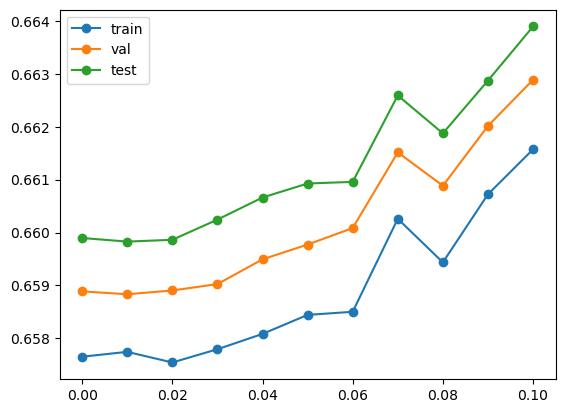

In [10]:
test_losses = []
val_losses = []
train_losses = []
test_srs = []
val_srs = []
train_srs = []
test_4b_ratios = []
val_4b_ratios = []
train_4b_ratios = []

sr_list = np.arange(0, 11) * 0.01
for sr in sr_list:
    run_name_2 = "_".join(
    [
        "fvt_picoAOD",
        f"signal_ratio={sr}",
        f"four_tag_ratio={four_tag_ratio}",
        f"dijet={dim_dijet_features}",
        f"quadjet={dim_quadjet_features}",
        f"n_3b={n_3b}",
        f"n_all4b={n_all4b}",
        f"epochs={max_epochs}",
        f"batch_size={batch_size}",
        f"val_ratio={val_ratio}",
        f"test_ratio={test_ratio}",
        f"seed={seed}",
    ]
)


    fvt_model_2 = FvTClassifier.load_from_checkpoint(f"./checkpoints/{run_name_2}_best.ckpt")
    fvt_model_2.eval()

    logits = fvt_model_2(events_train.X_torch.to(device))
    loss = fvt_model_2.loss(logits, events_train.is_4b_torch.to(device)).detach().cpu()
    train_losses.append(((events_train.weights_torch * loss).sum() / events_train.weights_torch.sum()).numpy())

    logits = fvt_model_2(events_val.X_torch.to(device))
    loss = fvt_model_2.loss(logits, events_val.is_4b_torch.to(device)).detach().cpu()
    val_losses.append(((events_val.weights_torch * loss).sum() / events_val.weights_torch.sum()).numpy())
    
    logits = fvt_model_2(events_test.X_torch.to(device))
    loss = fvt_model_2.loss(logits, events_test.is_4b_torch.to(device)).detach().cpu()
    test_losses.append(((events_test.weights_torch * loss).sum() / events_test.weights_torch.sum()).numpy())

    train_srs.append(events_train.total_weight_signal / events_train.total_weight_4b)
    val_srs.append(events_val.total_weight_signal / events_val.total_weight_4b)
    test_srs.append(events_test.total_weight_signal / events_test.total_weight_4b)

    train_4b_ratios.append(events_train.total_weight_4b / events_train.total_weight)
    val_4b_ratios.append(events_val.total_weight_4b / events_val.total_weight)
    test_4b_ratios.append(events_test.total_weight_4b / events_test.total_weight)


print("Train signal ratio: {}".format(events_train.total_weight_signal / events_train.total_weight_4b))
print("Val signal ratio: {}".format(events_val.total_weight_signal / events_val.total_weight_4b))
print("Test signal ratio: {}".format(events_test.total_weight_signal / events_test.total_weight_4b))
plt.plot(sr_list, train_losses, label="train", marker="o")
plt.plot(sr_list, val_losses, label="val", marker="o")
plt.plot(sr_list, test_losses, label="test", marker="o")
plt.legend()
plt.show()

# plt.plot(sr_list, train_srs, label="train", marker="o")
# plt.plot(sr_list, val_srs, label="val", marker="o")
# plt.plot(sr_list, test_srs, label="test", marker="o")
# plt.legend()
# plt.show()
# plt.close()

# plt.plot(sr_list, train_4b_ratios, label="train", marker="o")
# plt.plot(sr_list, val_4b_ratios, label="val", marker="o")
# plt.plot(sr_list, test_4b_ratios, label="test", marker="o")
# plt.legend()
# plt.show()
# plt.close()

**Test Data**


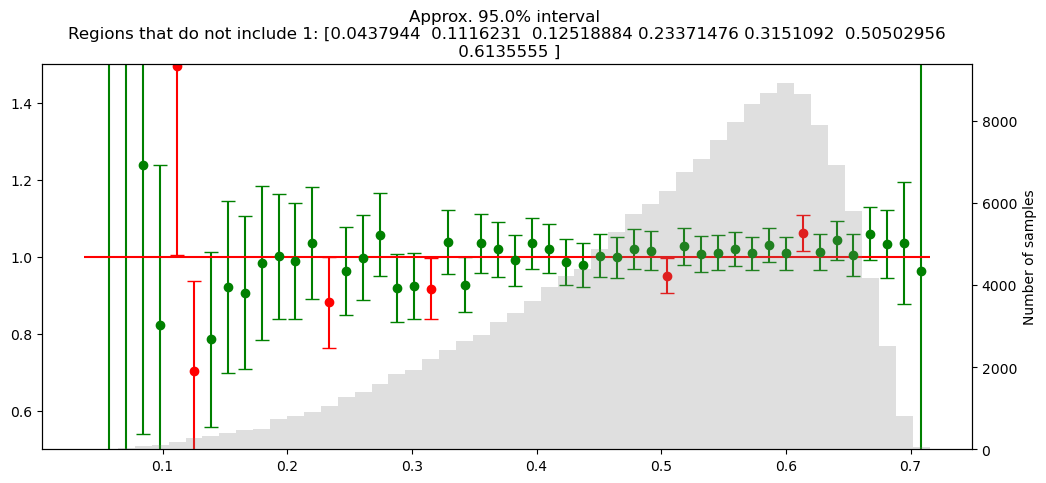

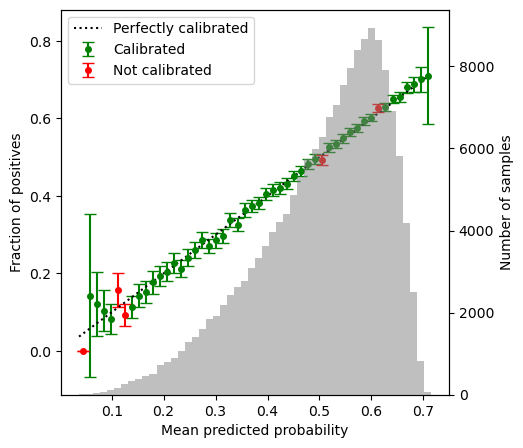

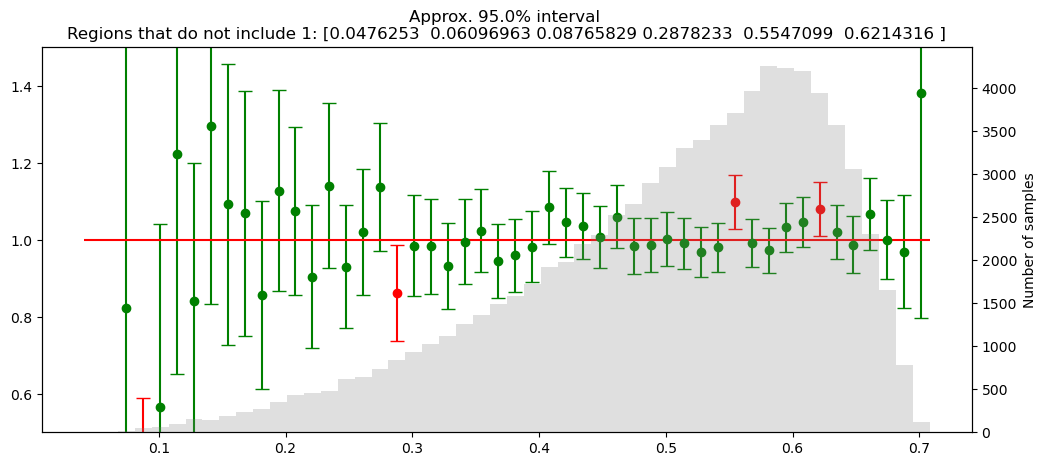

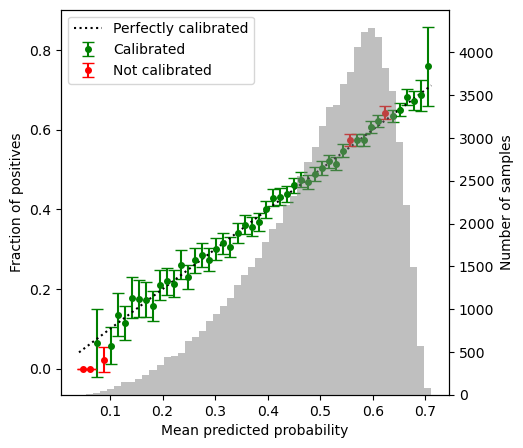

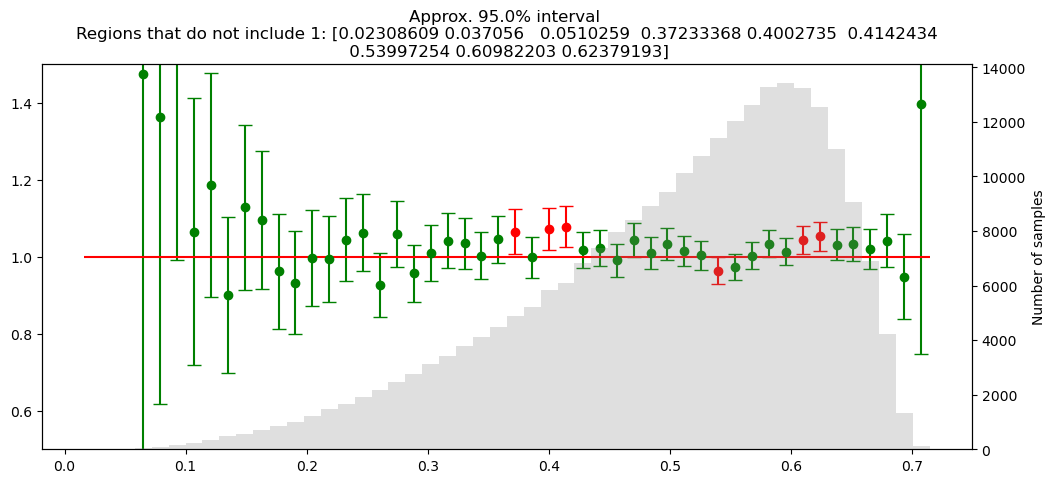

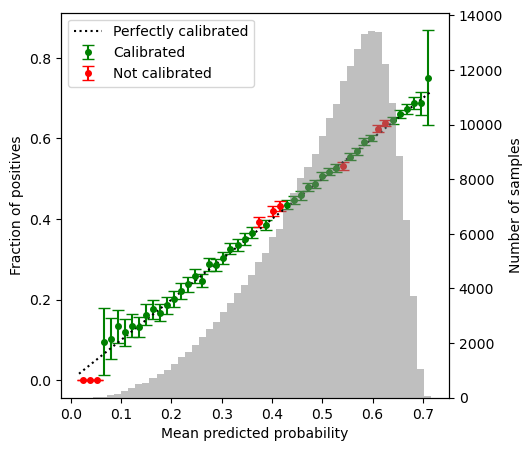

In [11]:
from plots import plot_prob_weighted_histogram1d, calibration_plot

print("**Test Data**")


plot_prob_weighted_histogram1d(events_train.fvt_score, 
                               events_train.fvt_score, 
                               events_train.is_4b,
                               n_bins=50, 
                               sample_weights=events_train.weights,
                               ylim=(0.5, 1.5))
calibration_plot(events_train.fvt_score, events_train.is_4b,
                 bins=50,
                 sample_weights=events_train.weights)

plot_prob_weighted_histogram1d(events_val.fvt_score, 
                               events_val.fvt_score, 
                               events_val.is_4b,
                               n_bins=50, 
                               sample_weights=events_val.weights,
                               ylim=(0.5, 1.5))
calibration_plot(events_val.fvt_score, events_val.is_4b,
                 bins=50,
                 sample_weights=events_val.weights)

plot_prob_weighted_histogram1d(events_test.fvt_score, 
                               events_test.fvt_score, 
                               events_test.is_4b,
                               n_bins=50, 
                               sample_weights=events_test.weights,
                               ylim=(0.5, 1.5))
calibration_plot(events_test.fvt_score, events_test.is_4b,
                 bins=50,
                 sample_weights=events_test.weights)

/tmp/ipykernel_621285/1964186131.py:19: RuntimeWarning: invalid value encountered in divide
  ratio_signal_fvt_cut = np.cumsum(hist_signal[::-1]) / np.cumsum(hist_bg4b[::-1] + hist_signal[::-1])


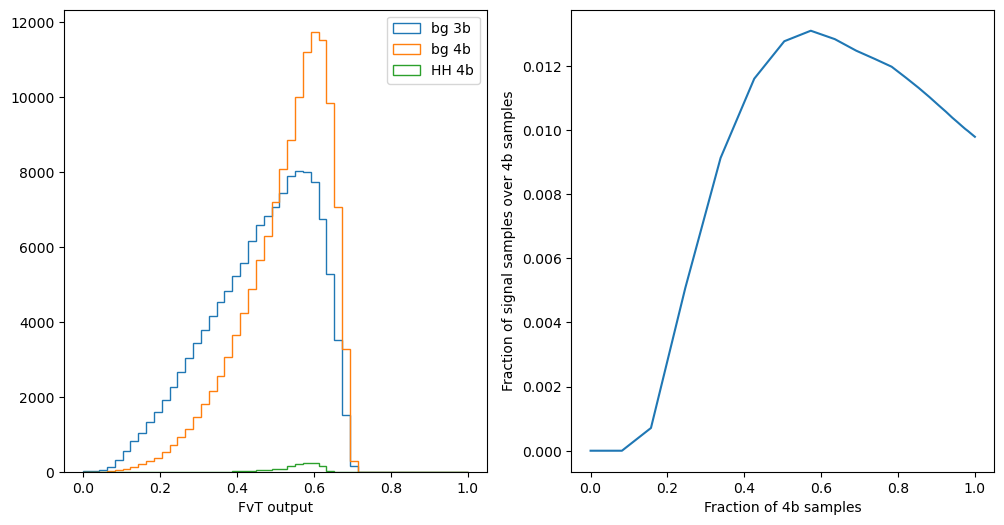

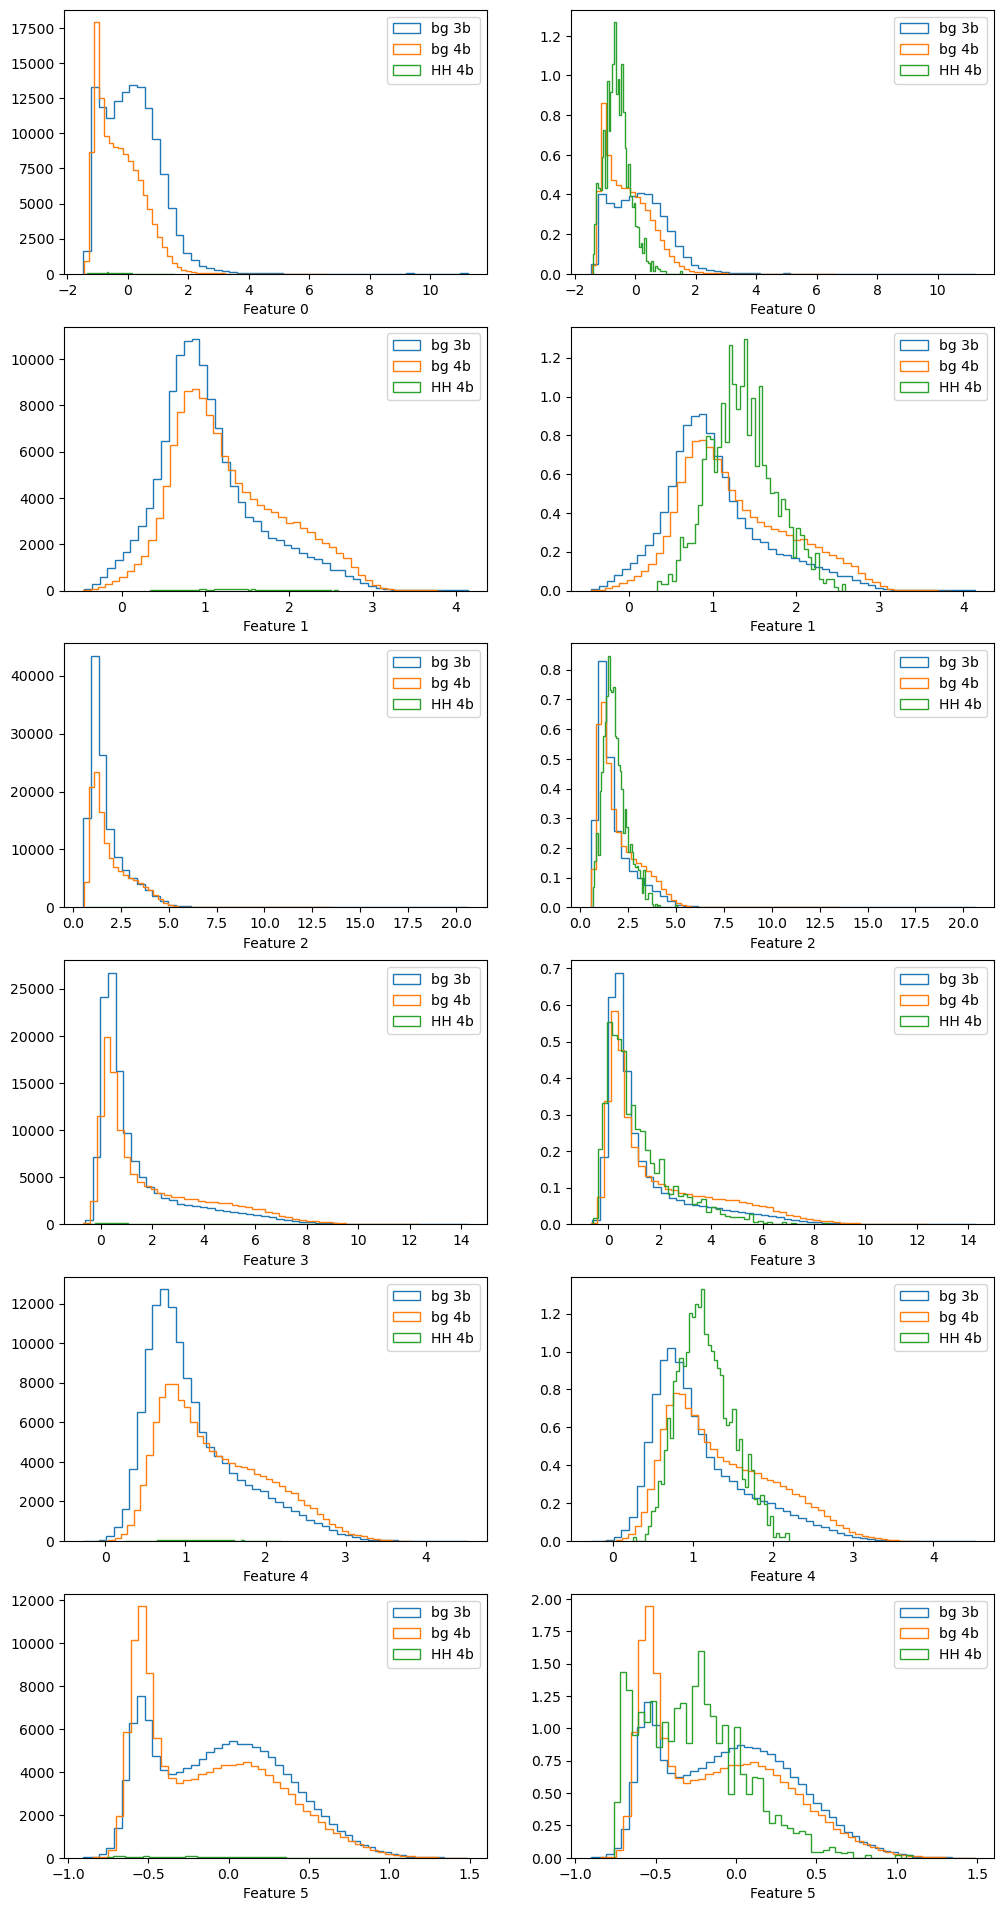

In [12]:
import matplotlib.pyplot as plt

# Pair plots with prob4b threshold

is_3b_test, is_bg4b_test, is_signal_test = events_test.is_3b, events_test.is_bg4b, events_test.is_signal
is_4b_test, w_test = events_test.is_4b, events_test.weights
fvt_score_test = events_test.fvt_score
att_q_repr_test = events_test.att_q_repr

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

bins_range = np.linspace(0, 1, 50)
hist_3b, _, _ = ax[0].hist(fvt_score_test[is_3b_test], bins=bins_range, label="bg 3b", linewidth=1, histtype="step", density=False, weights=w_test[is_3b_test])
hist_bg4b, _, _ = ax[0].hist(fvt_score_test[is_bg4b_test], bins=bins_range, label="bg 4b", linewidth=1, histtype="step", density=False, weights=w_test[is_bg4b_test])
hist_signal, _, _ = ax[0].hist(fvt_score_test[is_signal_test], bins=bins_range, label="HH 4b", linewidth=1, histtype="step", density=False, weights=w_test[is_signal_test])
ax[0].legend()
ax[0].set_xlabel("FvT output")

ratio_signal_fvt_cut = np.cumsum(hist_signal[::-1]) / np.cumsum(hist_bg4b[::-1] + hist_signal[::-1])
ratio_signal_fvt_cut = ratio_signal_fvt_cut[::-1]
ratio_4b_samples_fvt_cut = np.cumsum(hist_bg4b[::-1] + hist_signal[::-1]) / np.sum(hist_bg4b + hist_signal)
ratio_4b_samples_fvt_cut = ratio_4b_samples_fvt_cut[::-1]

ax[1].plot(ratio_4b_samples_fvt_cut, ratio_signal_fvt_cut, label="Signal / all 4b")
ax[1].set_xlabel("Fraction of 4b samples")
ax[1].set_ylabel("Fraction of signal samples over 4b samples")

plt.show()
plt.close()

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 24))

for i in range(dim_quadjet_features):
    ax[i, 0].hist(att_q_repr_test[is_3b_test, i], bins=50, label="bg 3b", linewidth=1, histtype="step", density=False, weights=w_test[is_3b_test])
    ax[i, 0].hist(att_q_repr_test[is_bg4b_test, i], bins=50, label="bg 4b", linewidth=1, histtype="step", density=False, weights=w_test[is_bg4b_test])
    ax[i, 0].hist(att_q_repr_test[is_signal_test, i], bins=50, label="HH 4b", linewidth=1, histtype="step", density=False, weights=w_test[is_signal_test])
    ax[i, 0].legend()
    ax[i, 0].set_xlabel(f"Feature {i}")
    
    ax[i, 1].hist(att_q_repr_test[is_3b_test, i], bins=50, label="bg 3b", linewidth=1, histtype="step", density=True, weights=w_test[is_3b_test])
    ax[i, 1].hist(att_q_repr_test[is_bg4b_test, i], bins=50, label="bg 4b", linewidth=1, histtype="step", density=True, weights=w_test[is_bg4b_test])
    ax[i, 1].hist(att_q_repr_test[is_signal_test, i], bins=50, label="HH 4b", linewidth=1, histtype="step", density=True, weights=w_test[is_signal_test])
    ax[i, 1].legend()
    ax[i, 1].set_xlabel(f"Feature {i}")

plt.show()
plt.close()



/tmp/ipykernel_621285/1127396710.py:17: RuntimeWarning: invalid value encountered in divide
  ratio_signal_fvt_cut = np.cumsum(hist_signal[::-1]) / np.cumsum(hist_bg4b[::-1] + hist_signal[::-1])
/tmp/ipykernel_621285/1127396710.py:37: RuntimeWarning: invalid value encountered in divide
  ax[2].stairs(hist_bg4b / hist_3b, bins_range, label="bg 4b / bg 3b", color="red")
/tmp/ipykernel_621285/1127396710.py:38: RuntimeWarning: invalid value encountered in divide
  ax[2].twinx().stairs(hist_signal / hist_3b, bins_range, label="HH 4b / bg 3b", color="blue")


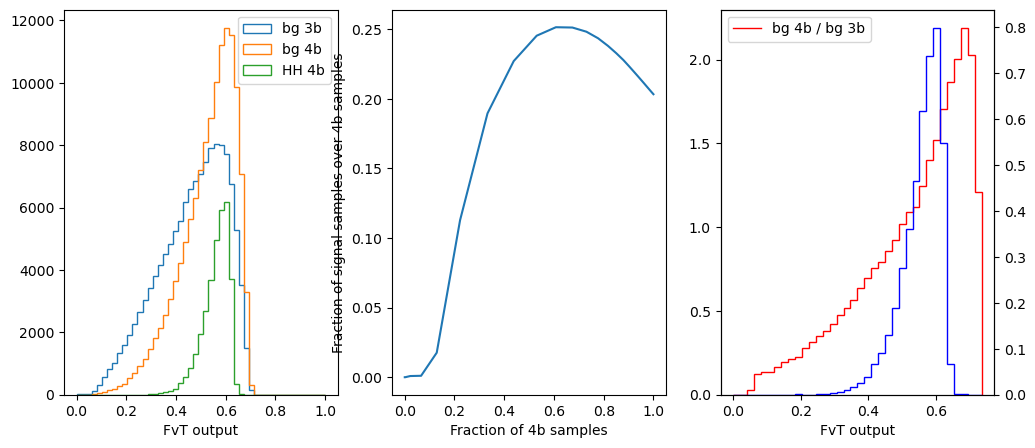

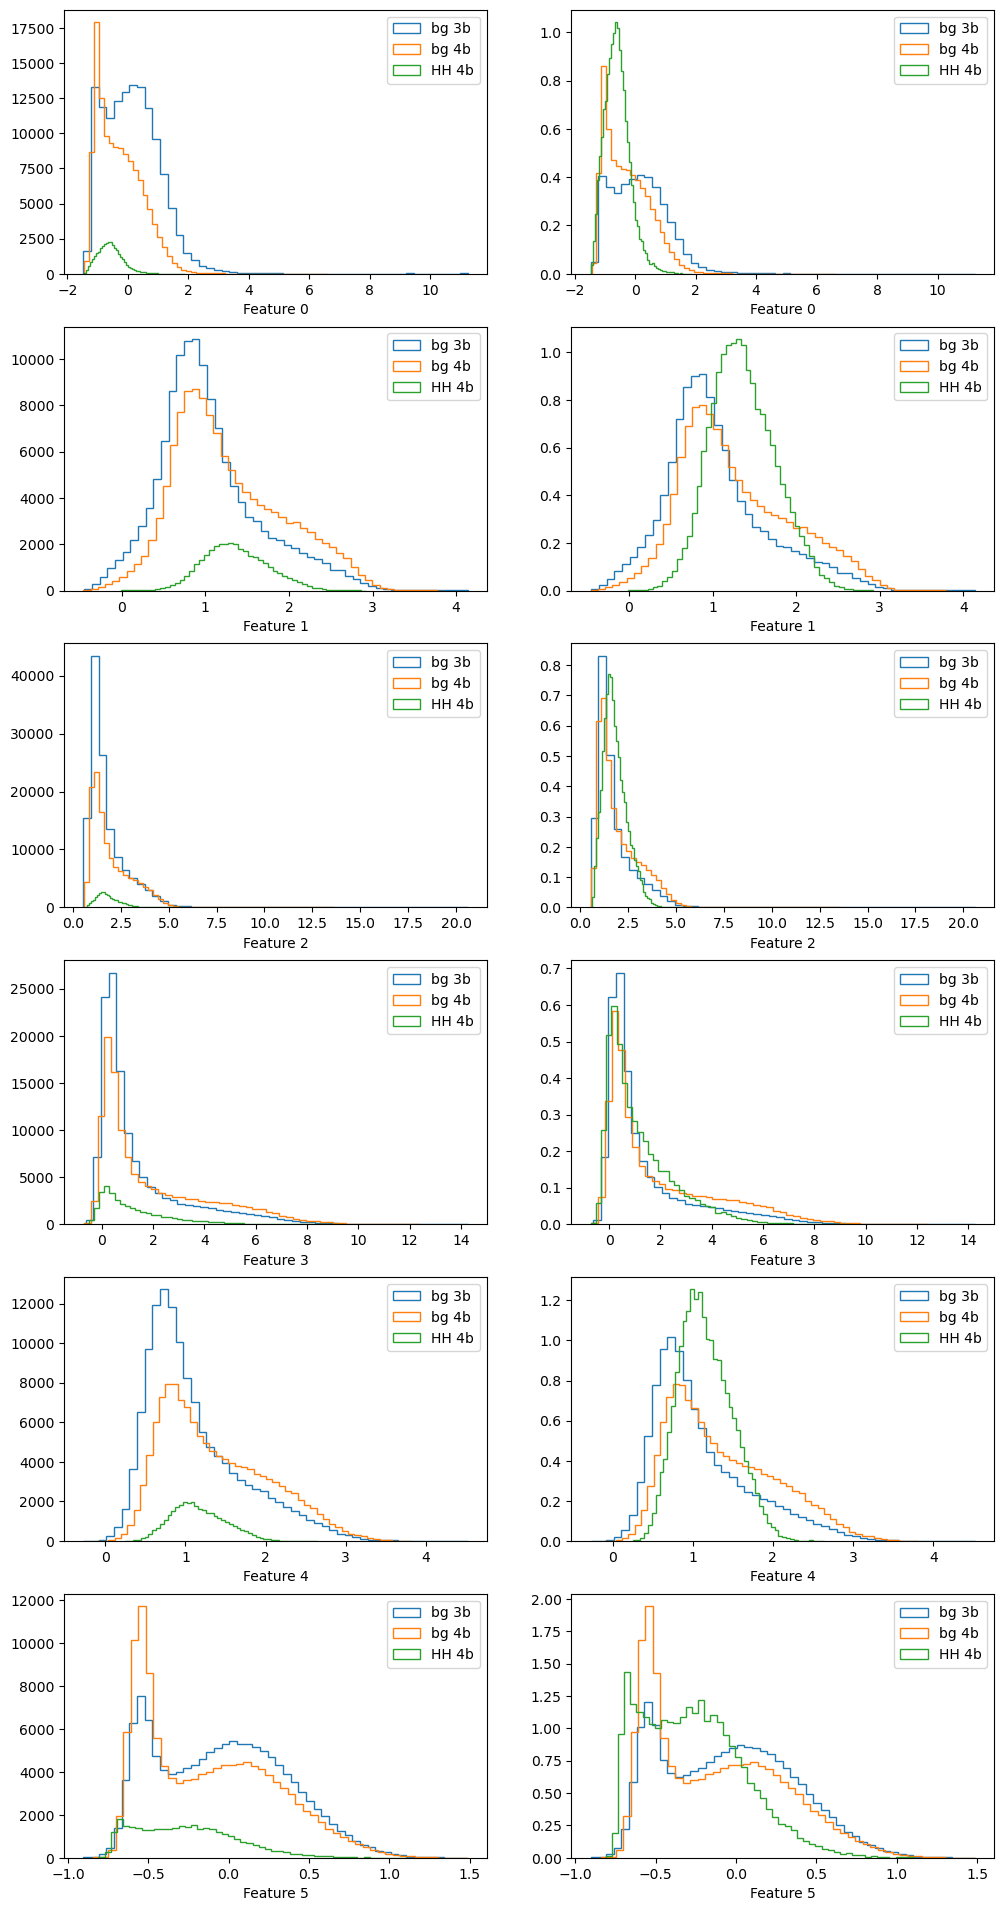

In [13]:
events_hh4b_all = EventsData.from_dataframe(df_signal, features)
events_hh4b_all.set_model_scores(fvt_model)
att_q_repr_hh4b = events_hh4b_all.att_q_repr
w_hh4b_all = events_hh4b_all.weights

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 5))

bins_range = np.linspace(0, 1, 50)
hist_3b, _, _ = ax[0].hist(fvt_score_test[is_3b_test], bins=bins_range, label="bg 3b", linewidth=1, histtype="step", density=False, weights=w_test[is_3b_test])
hist_bg4b, _, _ = ax[0].hist(fvt_score_test[is_bg4b_test], bins=bins_range, label="bg 4b", linewidth=1, histtype="step", density=False, weights=w_test[is_bg4b_test])
hist_signal, _, _ = ax[0].hist(events_hh4b_all.fvt_score, bins=bins_range, label="HH 4b", linewidth=1, histtype="step", density=False, weights=w_hh4b_all)
ax[0].legend()
ax[0].set_xlabel("FvT output")

ratio_signal_fvt_cut = np.cumsum(hist_signal[::-1]) / np.cumsum(hist_bg4b[::-1] + hist_signal[::-1])
ratio_signal_fvt_cut = ratio_signal_fvt_cut[::-1]
ratio_4b_samples_fvt_cut = np.cumsum(hist_bg4b[::-1] + hist_signal[::-1]) / np.sum(hist_bg4b + hist_signal)
ratio_4b_samples_fvt_cut = ratio_4b_samples_fvt_cut[::-1]
ratio_all_samples_fvt_cut = np.cumsum(hist_3b[::-1] + hist_bg4b[::-1] + hist_signal[::-1]) / np.sum(hist_3b + hist_bg4b + hist_signal)
ratio_all_samples_fvt_cut = ratio_all_samples_fvt_cut[::-1]
ratio_signal_samples_fvt_cut = np.cumsum(hist_signal[::-1]) / np.sum(hist_signal)
ratio_signal_samples_fvt_cut = ratio_signal_samples_fvt_cut[::-1]

ax[1].plot(ratio_4b_samples_fvt_cut, ratio_signal_fvt_cut, label="Signal / all 4b")
ax[1].set_xlabel("Fraction of 4b samples")
ax[1].set_ylabel("Fraction of signal samples over 4b samples")


# ax[2].plot(ratio_all_samples_fvt_cut, ratio_signal_samples_fvt_cut, label="Signal / all 4b")
# ax[2].plot([0, 1], [0, 1], "--", color="black")
# ax[2].set_xlabel("Fraction of 4b samples")
# ax[2].set_ylabel("Fraction of all samples")
# ax[2].grid(axis="both")

ax[2].stairs(hist_bg4b / hist_3b, bins_range, label="bg 4b / bg 3b", color="red")
ax[2].twinx().stairs(hist_signal / hist_3b, bins_range, label="HH 4b / bg 3b", color="blue")
ax[2].legend()
ax[2].set_xlabel("FvT output")


plt.show()
plt.close()

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(12, 24))

for i in range(dim_quadjet_features):
    ax[i, 0].hist(att_q_repr_test[is_3b_test, i], bins=50, label="bg 3b", linewidth=1, histtype="step", density=False, weights=w_test[is_3b_test])
    ax[i, 0].hist(att_q_repr_test[is_bg4b_test, i], bins=50, label="bg 4b", linewidth=1, histtype="step", density=False, weights=w_test[is_bg4b_test])
    ax[i, 0].hist(att_q_repr_hh4b[:, i], bins=50, label="HH 4b", linewidth=1, histtype="step", density=False, weights=w_hh4b_all)
    ax[i, 0].legend()
    ax[i, 0].set_xlabel(f"Feature {i}")
    
    ax[i, 1].hist(att_q_repr_test[is_3b_test, i], bins=50, label="bg 3b", linewidth=1, histtype="step", density=True, weights=w_test[is_3b_test])
    ax[i, 1].hist(att_q_repr_test[is_bg4b_test, i], bins=50, label="bg 4b", linewidth=1, histtype="step", density=True, weights=w_test[is_bg4b_test])
    ax[i, 1].hist(att_q_repr_hh4b[:, i], bins=50, label="HH 4b", linewidth=1, histtype="step", density=True, weights=w_hh4b_all)
    ax[i, 1].legend()
    ax[i, 1].set_xlabel(f"Feature {i}")

plt.show()
plt.close()



In [14]:
events_hh4b_some = EventsData.from_dataframe(df_signal, features)
events_hh4b_some.shuffle()
events_hh4b_some.trim(int(np.sum(events_test.is_4b) * 0.02))

events_more_hh4b = EventsData.merge([events_test[~events_test.is_signal], events_hh4b_some])
events_more_hh4b.shuffle()
events_more_hh4b.set_model_scores(fvt_model)

In [15]:
from signal_region import get_fvt_cut_regions
from plots import plot_cluster

fvt_cut = 0.0
w_cuts = np.arange(0.01, 1.01, 0.01)
is_in_regions_list, reducer = get_fvt_cut_regions(events_more_hh4b, fvt_cut=fvt_cut, w_cuts=w_cuts, seed=seed,
                                                 return_reducer=True, reducer_args={"random_state": seed}, 
                                                 init_bins=10000, max_bins=50)

/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/soheuny/miniconda3/envs/coffea_torch/lib/python3.11/site-packages/umap/umap_.py:1943: UserWarning: n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


Thresholded 4b clustering
bg4b:  123965
signal:  2503


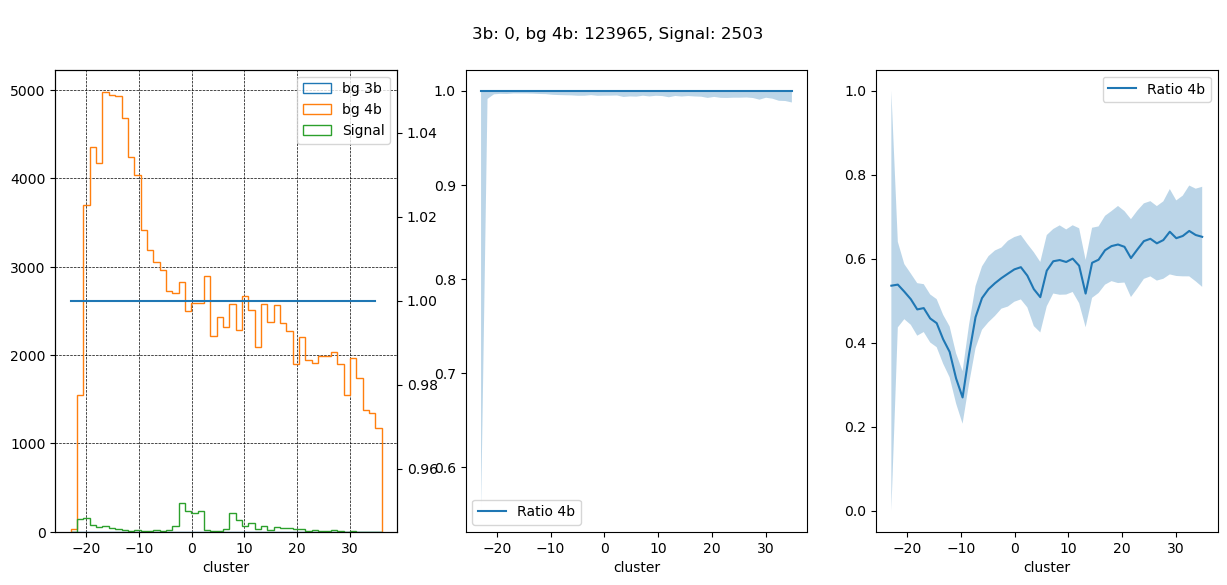

Thresholded samples
3b:  124810
bg4b:  123965
hh4b:  2503


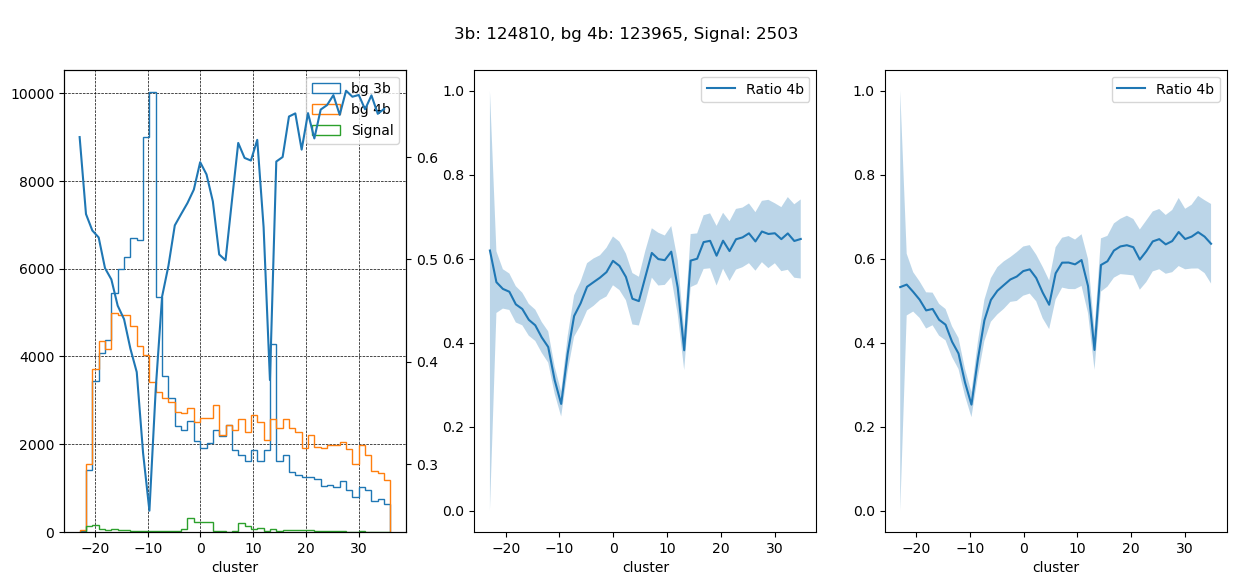

No samples exceeded threshold
All samples
3b:  124810
bg4b:  123965
hh4b:  2503


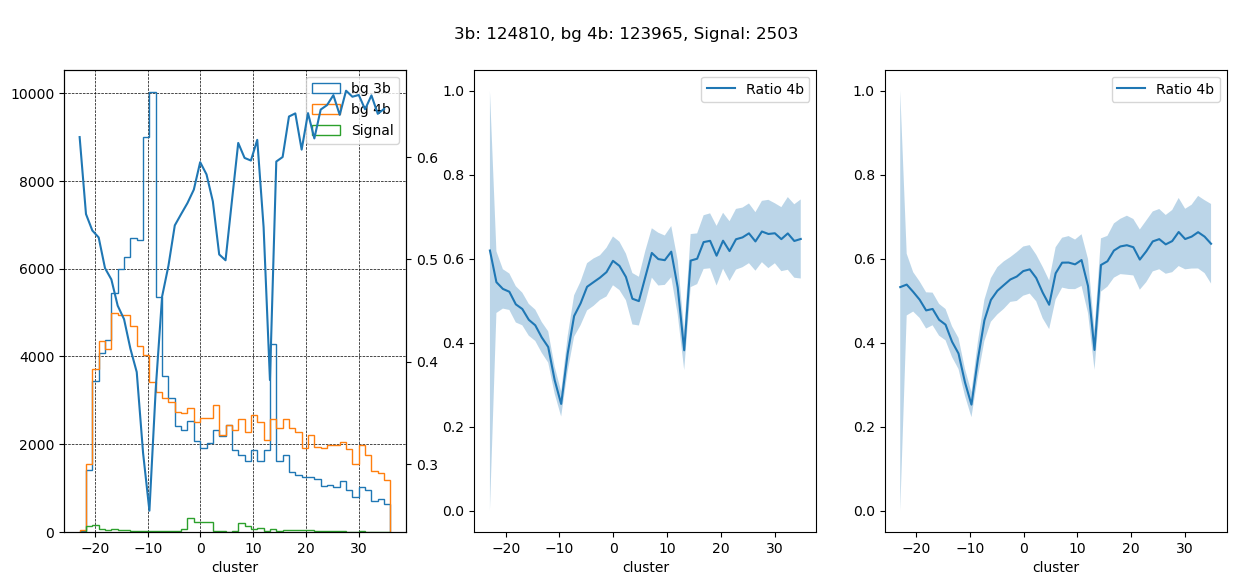

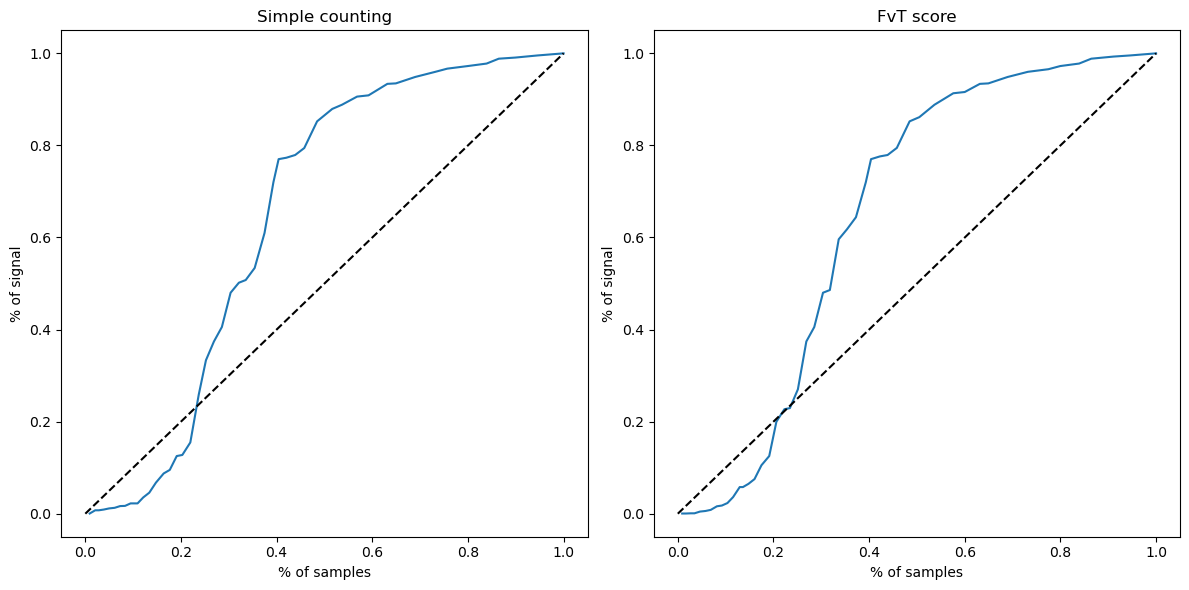

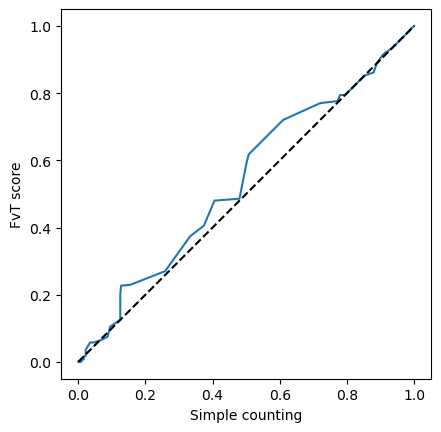

In [16]:
n_components = 1
fvt_exceeded = events_more_hh4b.fvt_score > fvt_cut

np.random.seed(seed)
cluster_samples = fvt_exceeded & events_more_hh4b.is_4b
events_cluster = events_more_hh4b[cluster_samples]

# print number of points in each class
print("Thresholded 4b clustering")
print("bg4b: ", np.sum(events_cluster.is_bg4b))
print("signal: ", np.sum(events_cluster.is_signal))

cluster_repr_test = events_cluster.npd["cluster_embed"]
plot_cluster(cluster_repr_test, events_cluster, n_components=n_components)


# Thresholded samples

print("Thresholded samples")
print("3b: ", np.sum(events_more_hh4b.is_3b & fvt_exceeded))
print("bg4b: ", np.sum(events_more_hh4b.is_bg4b & fvt_exceeded))
print("hh4b: ", np.sum(events_more_hh4b.is_signal & fvt_exceeded))

thrsed_samples = fvt_exceeded
events_thrsed = events_more_hh4b[thrsed_samples]
cluster_repr_thrsed = events_thrsed.npd["cluster_embed"]

plot_cluster(cluster_repr_thrsed, events_thrsed, n_components=n_components)

# Failed samples

if not np.any(~fvt_exceeded):
    print("No samples exceeded threshold")
else:
    print("Failed samples")
    print("3b: ", np.sum(events_more_hh4b.is_3b & ~fvt_exceeded))
    print("bg4b: ", np.sum(events_more_hh4b.is_bg4b & ~fvt_exceeded))
    print("hh4b: ", np.sum(events_more_hh4b.is_signal & ~fvt_exceeded))

    failed_samples = ~fvt_exceeded
    events_failed = events_more_hh4b[failed_samples]
    cluster_repr_failed = events_failed.npd["cluster_embed"]

    plot_cluster(cluster_repr_failed, events_failed, n_components=n_components)

# all samples

print("All samples")
print("3b: ", np.sum(events_more_hh4b.is_3b))
print("bg4b: ", np.sum(events_more_hh4b.is_bg4b))
print("hh4b: ", np.sum(events_more_hh4b.is_signal))

all_samples = np.ones(len(events_more_hh4b), dtype=bool)
events_all = events_more_hh4b[all_samples]
cluster_repr_all = events_all.npd["cluster_embed"]

plot_cluster(cluster_repr_all, events_all, n_components=n_components)


n_bins = 50
cluster_embed_more_hh4b = events_more_hh4b.npd["cluster_embed"].reshape(-1)
bins_range = np.linspace(np.min(cluster_embed_more_hh4b), 
                         np.max(cluster_embed_more_hh4b), n_bins + 1)

hist_3b, _ = np.histogram(cluster_embed_more_hh4b[events_more_hh4b.is_3b], 
                          bins=bins_range, weights=events_more_hh4b.weights[events_more_hh4b.is_3b])
hist_bg4b, _ = np.histogram(cluster_embed_more_hh4b[events_more_hh4b.is_bg4b], 
                            bins=bins_range, weights=events_more_hh4b.weights[events_more_hh4b.is_bg4b])
hist_signal, _ = np.histogram(cluster_embed_more_hh4b[events_more_hh4b.is_signal], 
                              bins=bins_range, weights=events_more_hh4b.weights[events_more_hh4b.is_signal])
hist_all = hist_3b + hist_bg4b + hist_signal
hist_4b = hist_bg4b + hist_signal

ratio_4b_cnt = hist_4b / hist_all
ratio_4b_fvt = np.zeros_like(ratio_4b_cnt)
for i in range(len(ratio_4b_fvt)):
    weights_bin = np.sum(
        events_more_hh4b.weights[(cluster_embed_more_hh4b > bins_range[i]) 
               & (cluster_embed_more_hh4b < bins_range[i + 1])])
    fvt_score_sum = np.sum(
        events_more_hh4b.fvt_score[(cluster_embed_more_hh4b > bins_range[i]) 
                              & (cluster_embed_more_hh4b < bins_range[i + 1])])
    ratio_4b_fvt[i] = fvt_score_sum / weights_bin

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# sort by ratio_4b_cnt and plot hist_3b, hist_bg4b, hist_signal

sort_idx_cnt = np.argsort(ratio_4b_cnt)[::-1]
# ax[0].stairs(np.cumsum(hist_3b[sort_idx_cnt]), np.arange(n_bins + 1), label="bg 3b")
# ax[0].stairs(np.cumsum(hist_bg4b[sort_idx_cnt]), np.arange(n_bins + 1), label="bg 4b")
# twin_ax = ax[0].twinx()
ax[0].plot(np.cumsum(hist_all[sort_idx_cnt]) / np.sum(hist_all), 
           np.cumsum(hist_signal[sort_idx_cnt]) / np.sum(hist_signal))
ax[0].plot([0, 1], [0, 1], linestyle="--", color="black")
ax[0].set_xlabel("% of samples")
ax[0].set_ylabel("% of signal")
ax[0].set_title("Simple counting")

sort_idx_fvt = np.argsort(ratio_4b_fvt)[::-1]
# ax[1].stairs(np.cumsum(hist_3b[sort_idx_fvt]), np.arange(n_bins + 1), label="bg 3b")
# ax[1].stairs(np.cumsum(hist_bg4b[sort_idx_fvt]), np.arange(n_bins + 1), label="bg 4b")
# twin_ax = ax[1].twinx()
ax[1].plot(np.cumsum(hist_all[sort_idx_fvt]) / np.sum(hist_all), 
           np.cumsum(hist_signal[sort_idx_fvt]) / np.sum(hist_signal))    
ax[1].plot([0, 1], [0, 1], linestyle="--", color="black")
ax[1].set_xlabel("% of samples")
ax[1].set_ylabel("% of signal")
ax[1].set_title("FvT score")

plt.tight_layout()
plt.show()
plt.close()


fig, ax = plt.subplots()

ax.plot(np.cumsum(hist_signal[sort_idx_cnt]) / np.sum(hist_signal), 
         np.cumsum(hist_signal[sort_idx_fvt]) / np.sum(hist_signal))
ax.plot([0, 1], [0, 1], linestyle="--", color="black")
ax.set_xlabel("Simple counting")
ax.set_ylabel("FvT score")
ax.set_aspect("equal")
plt.show()
plt.close()

In [17]:
len(events_signal)

2500

Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42


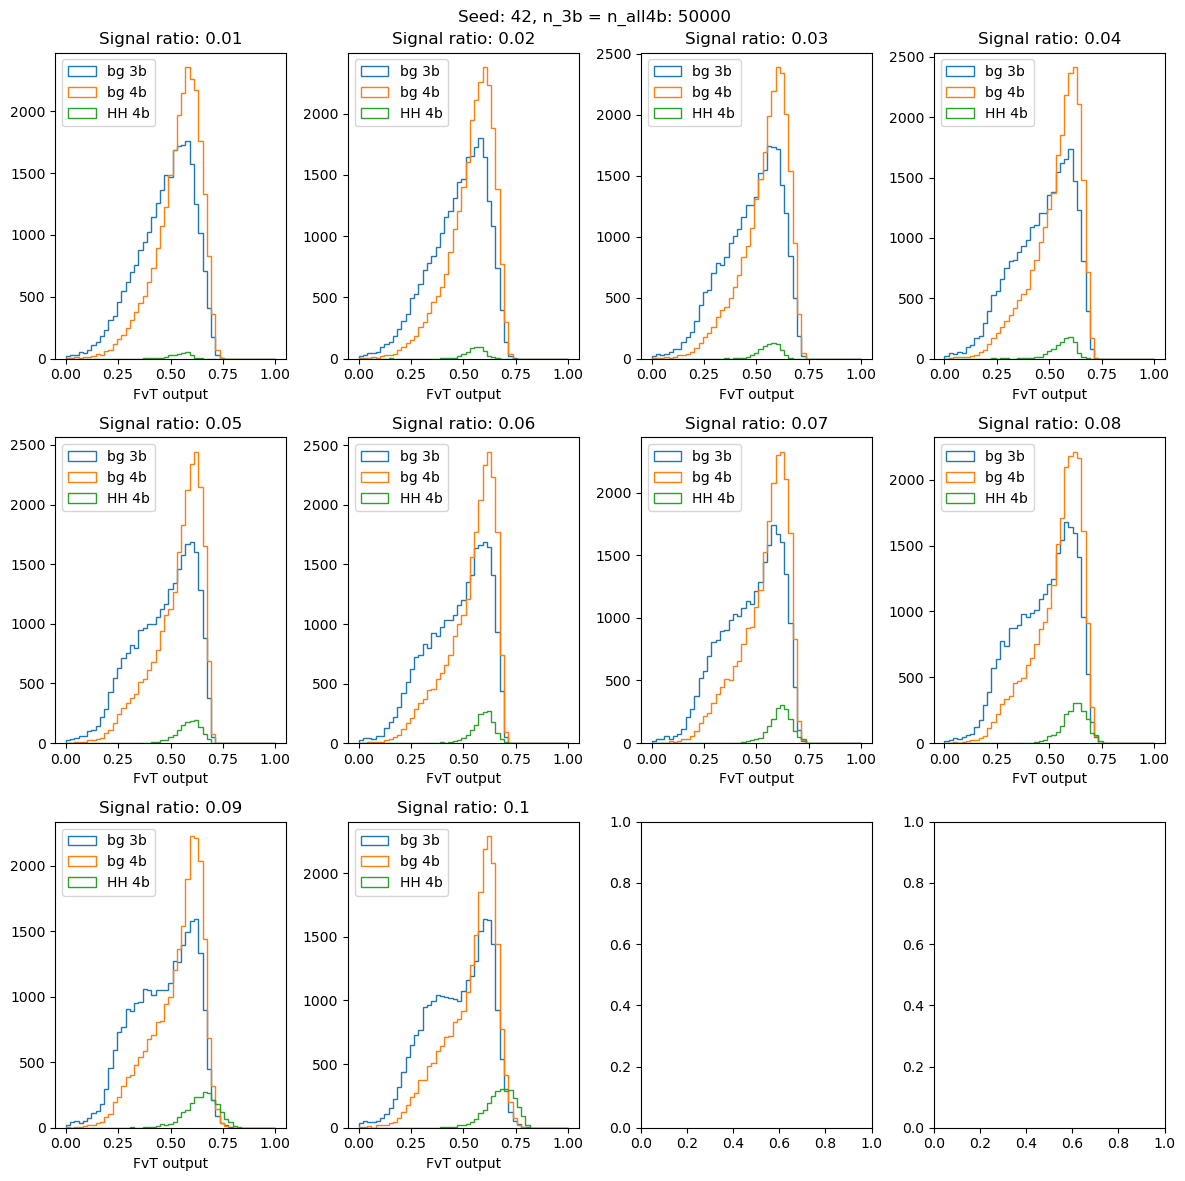

Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42
Seed set to 42


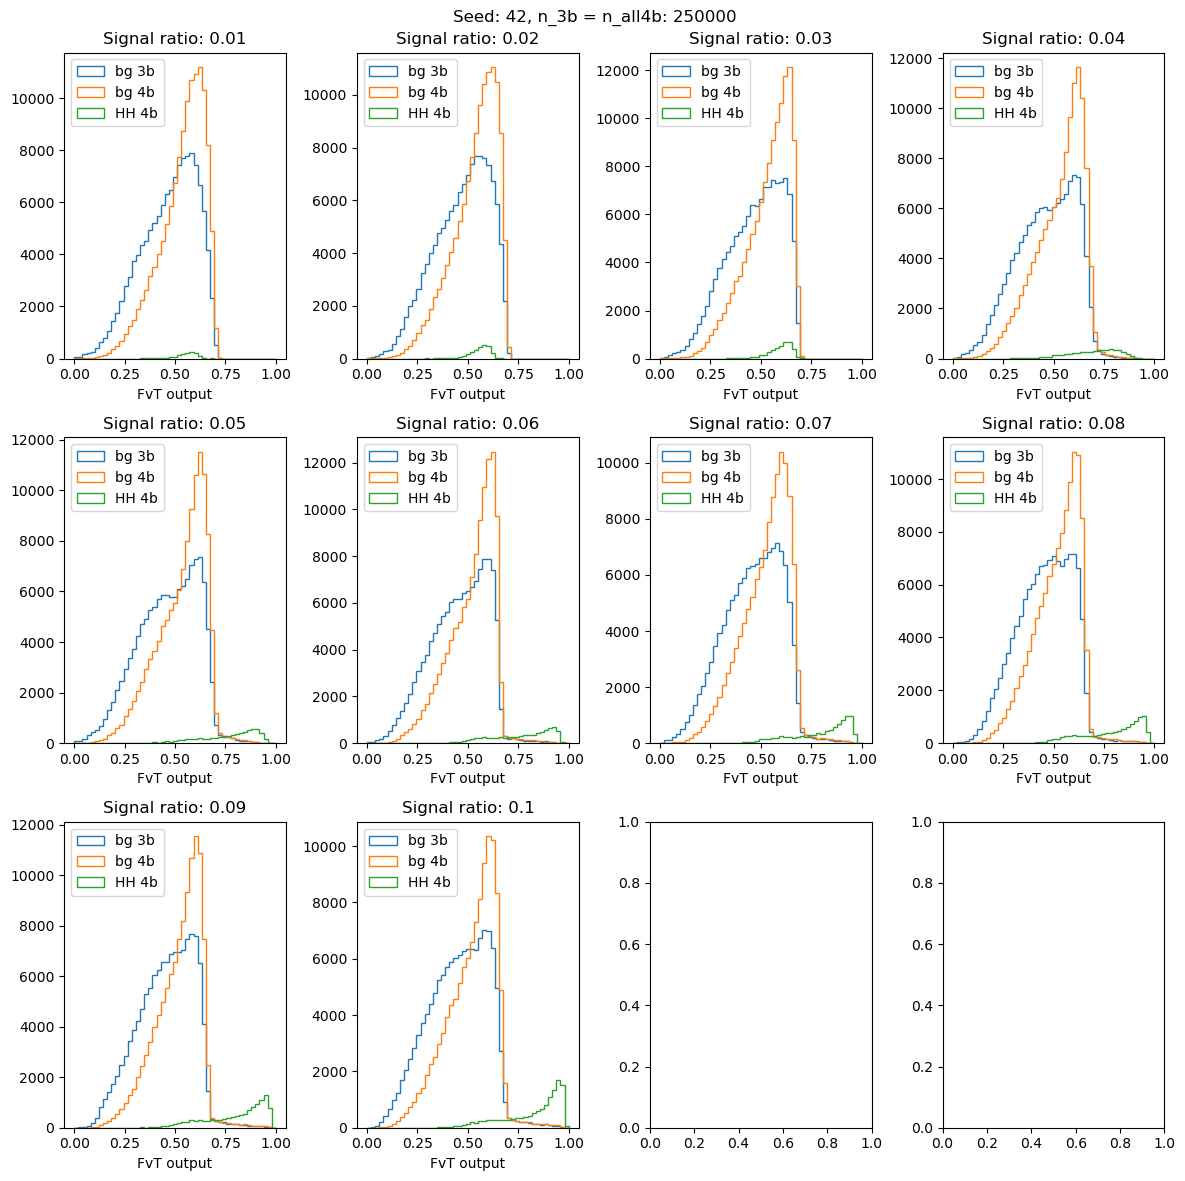

Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52


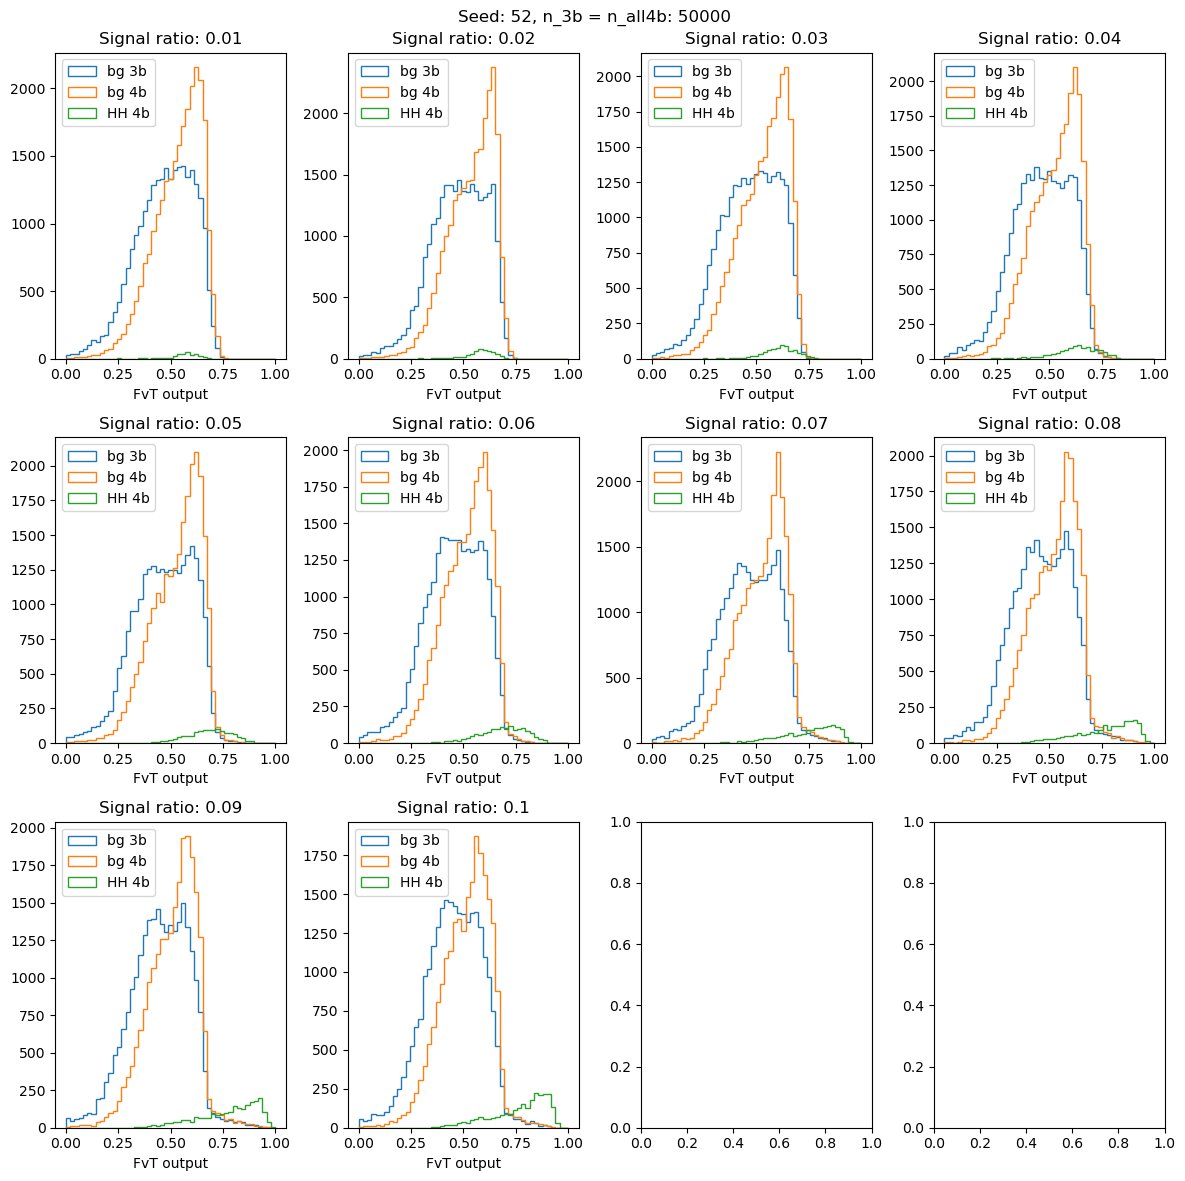

Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52
Seed set to 52


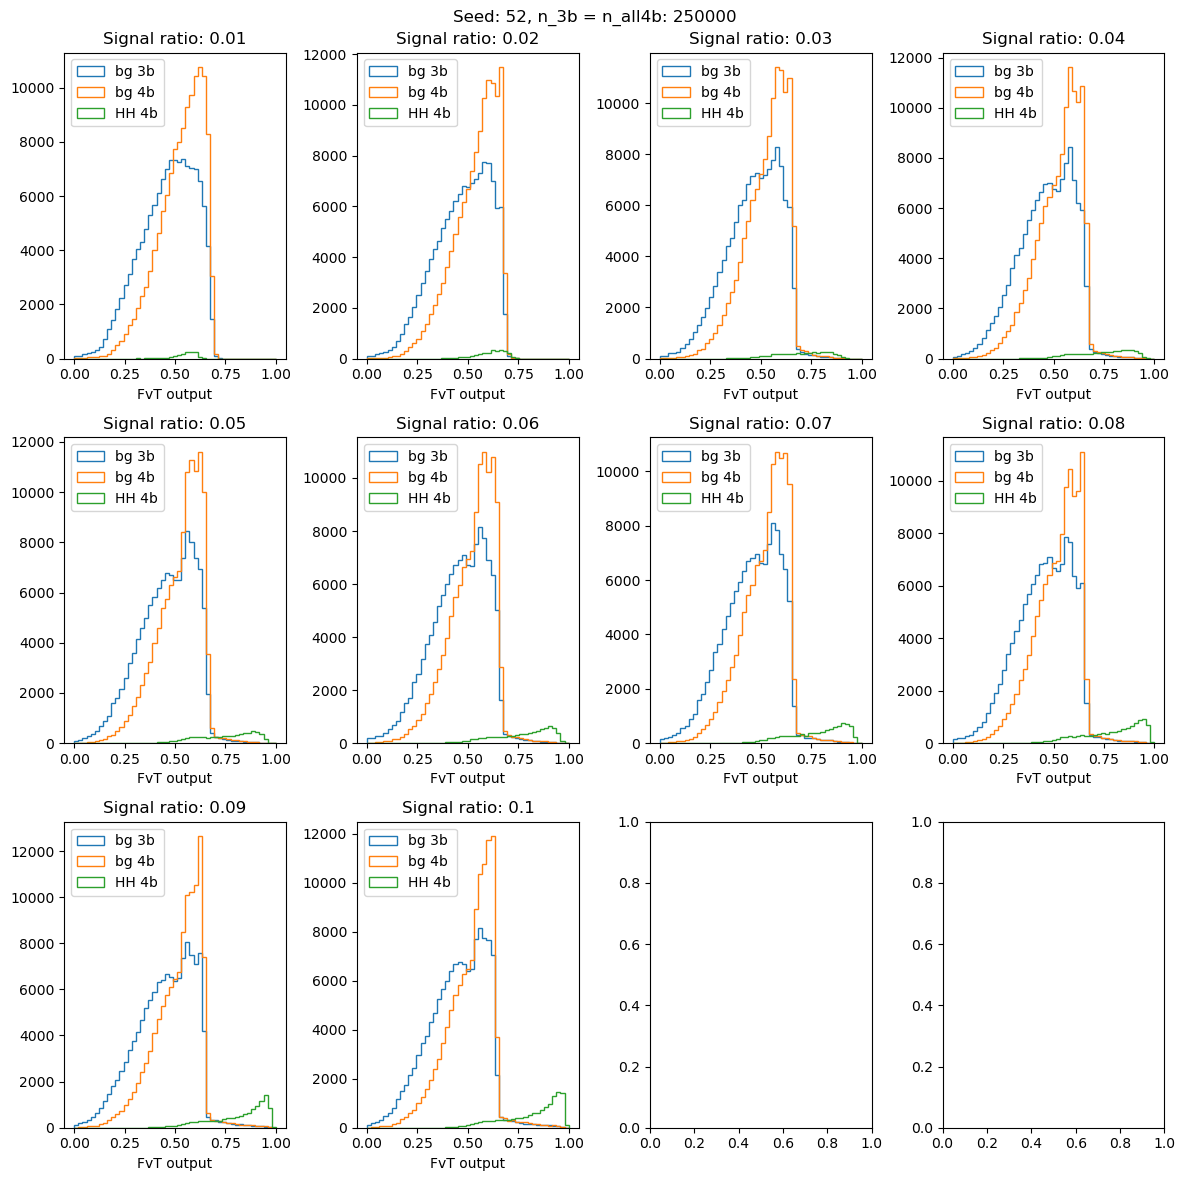

Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62


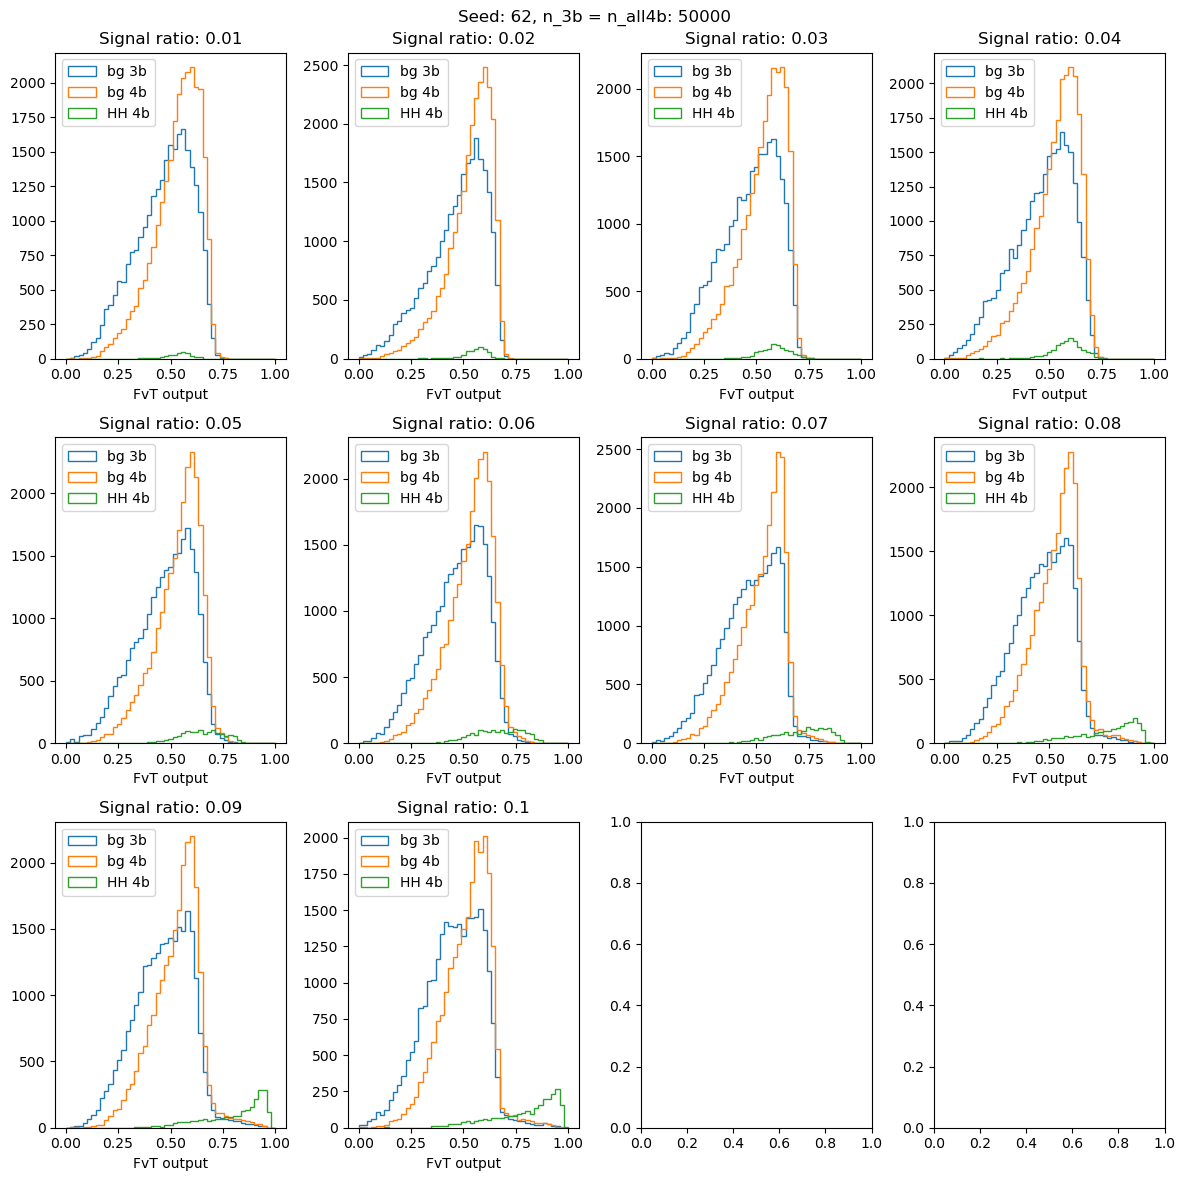

Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62
Seed set to 62


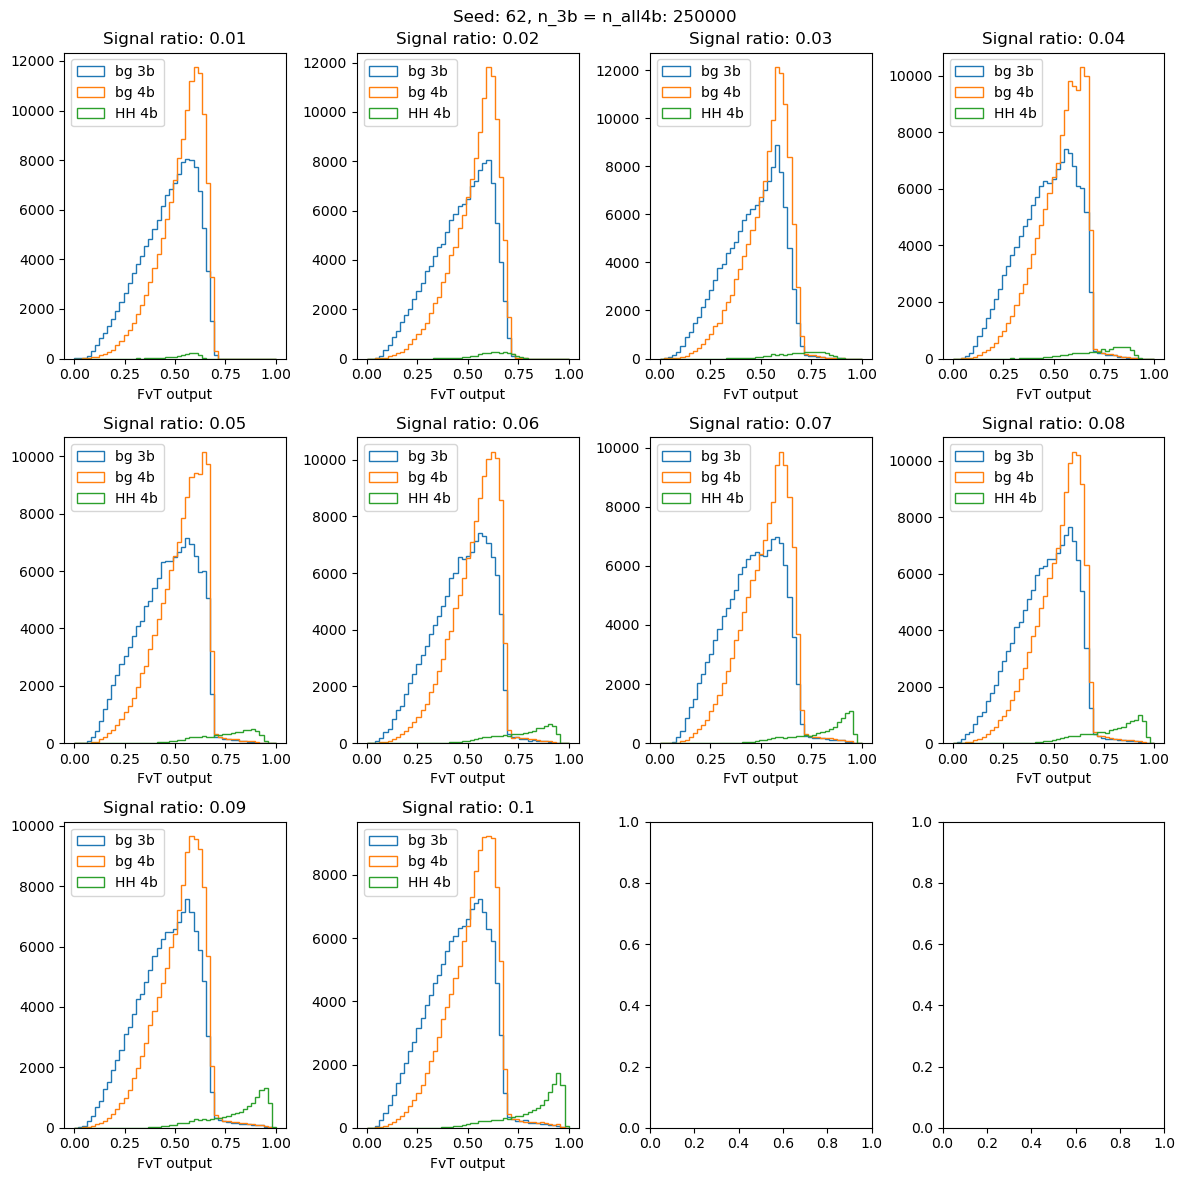

Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72


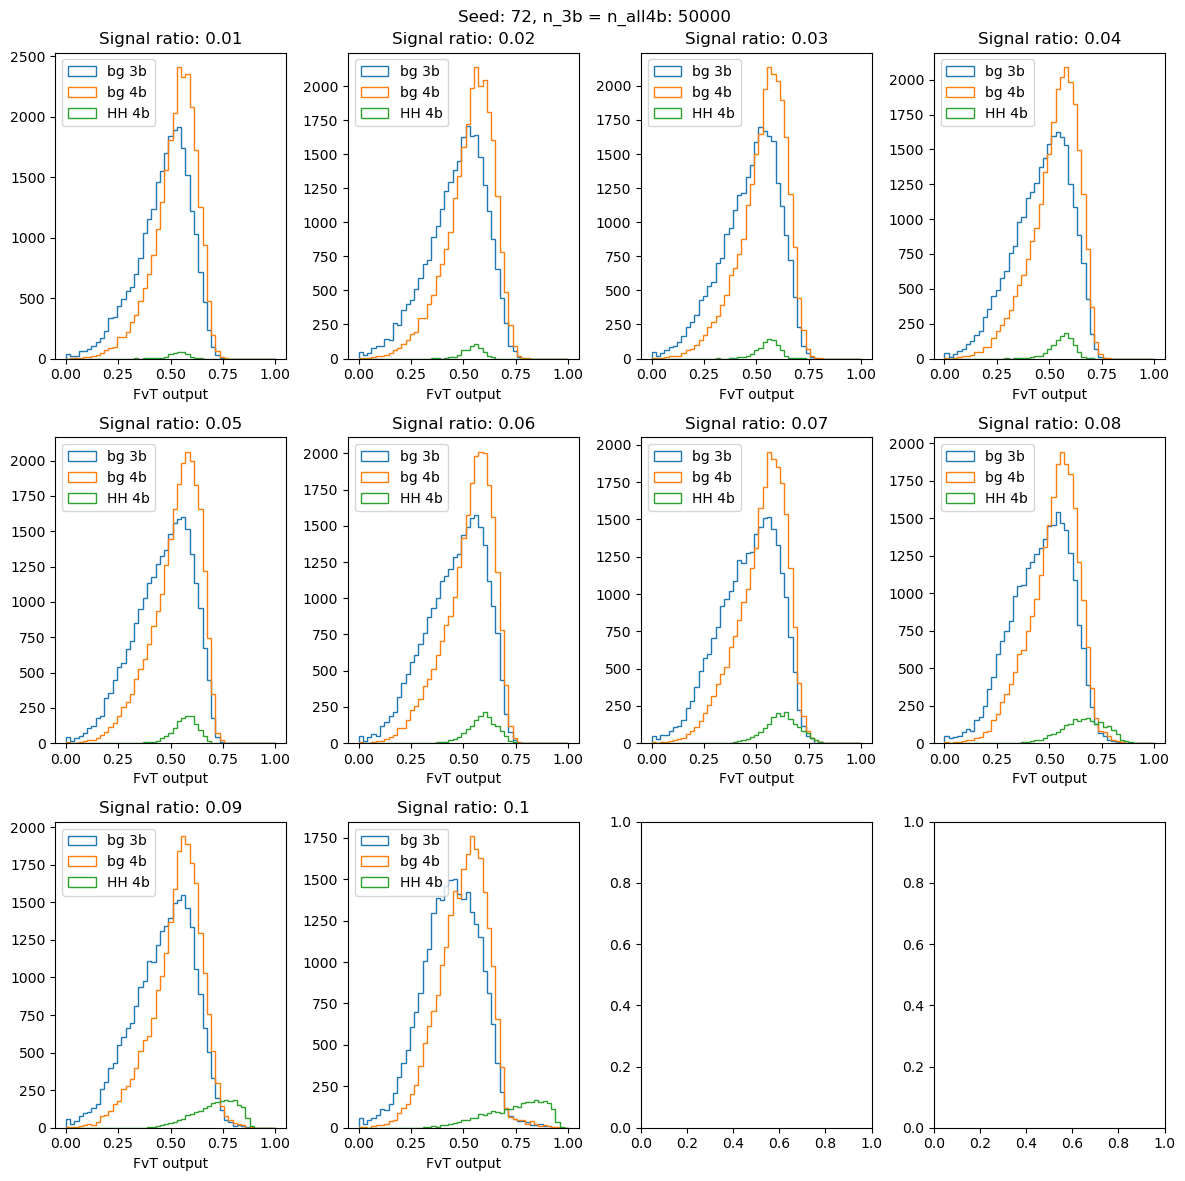

Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72
Seed set to 72


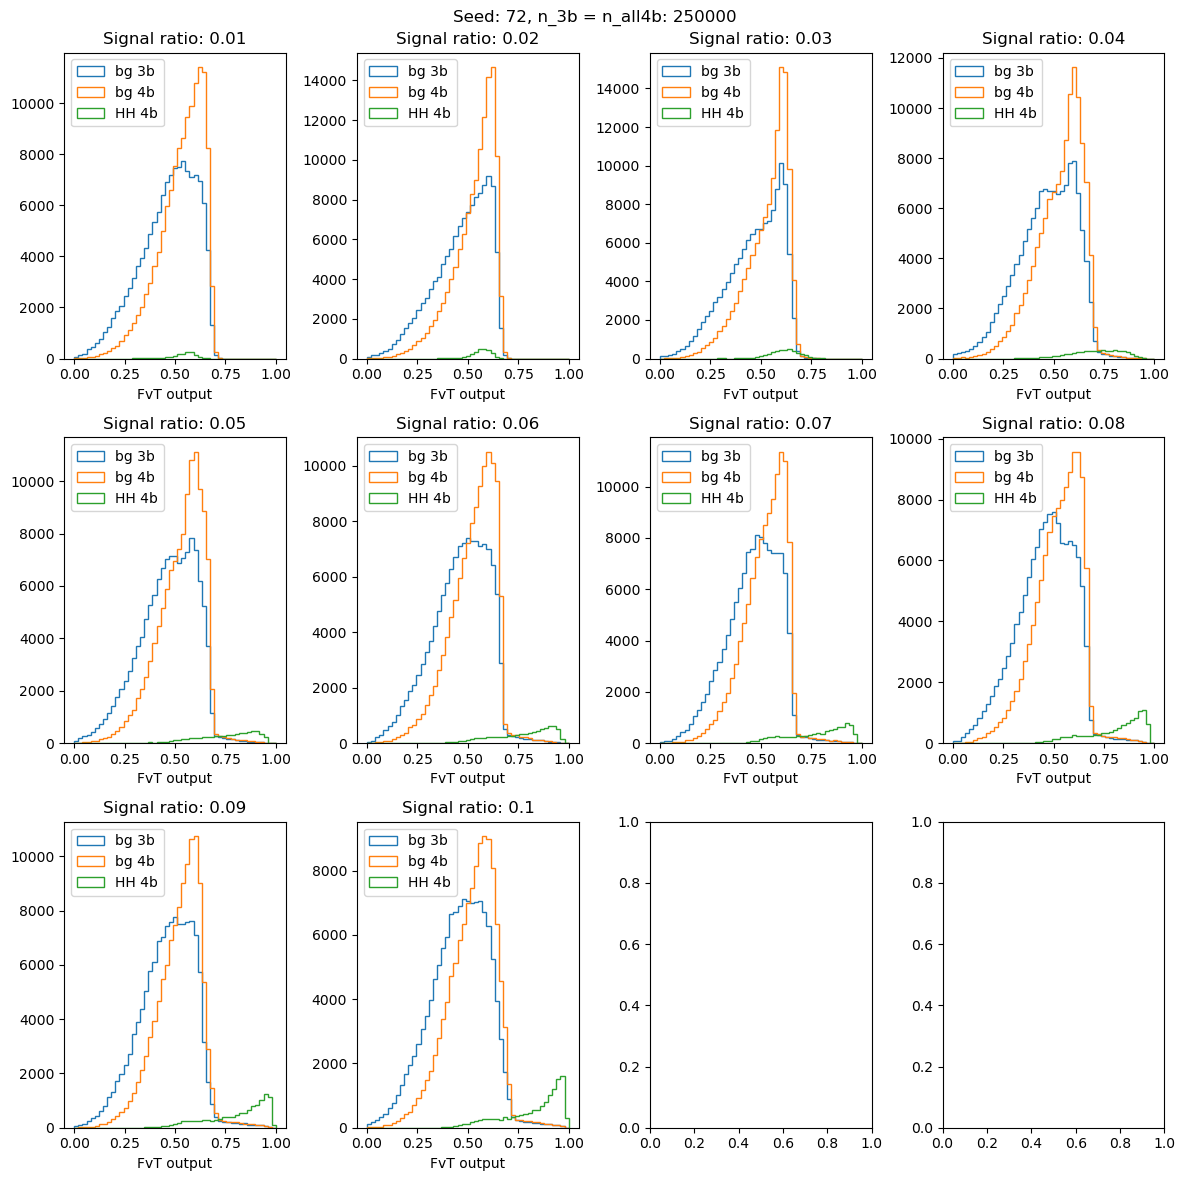

Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82


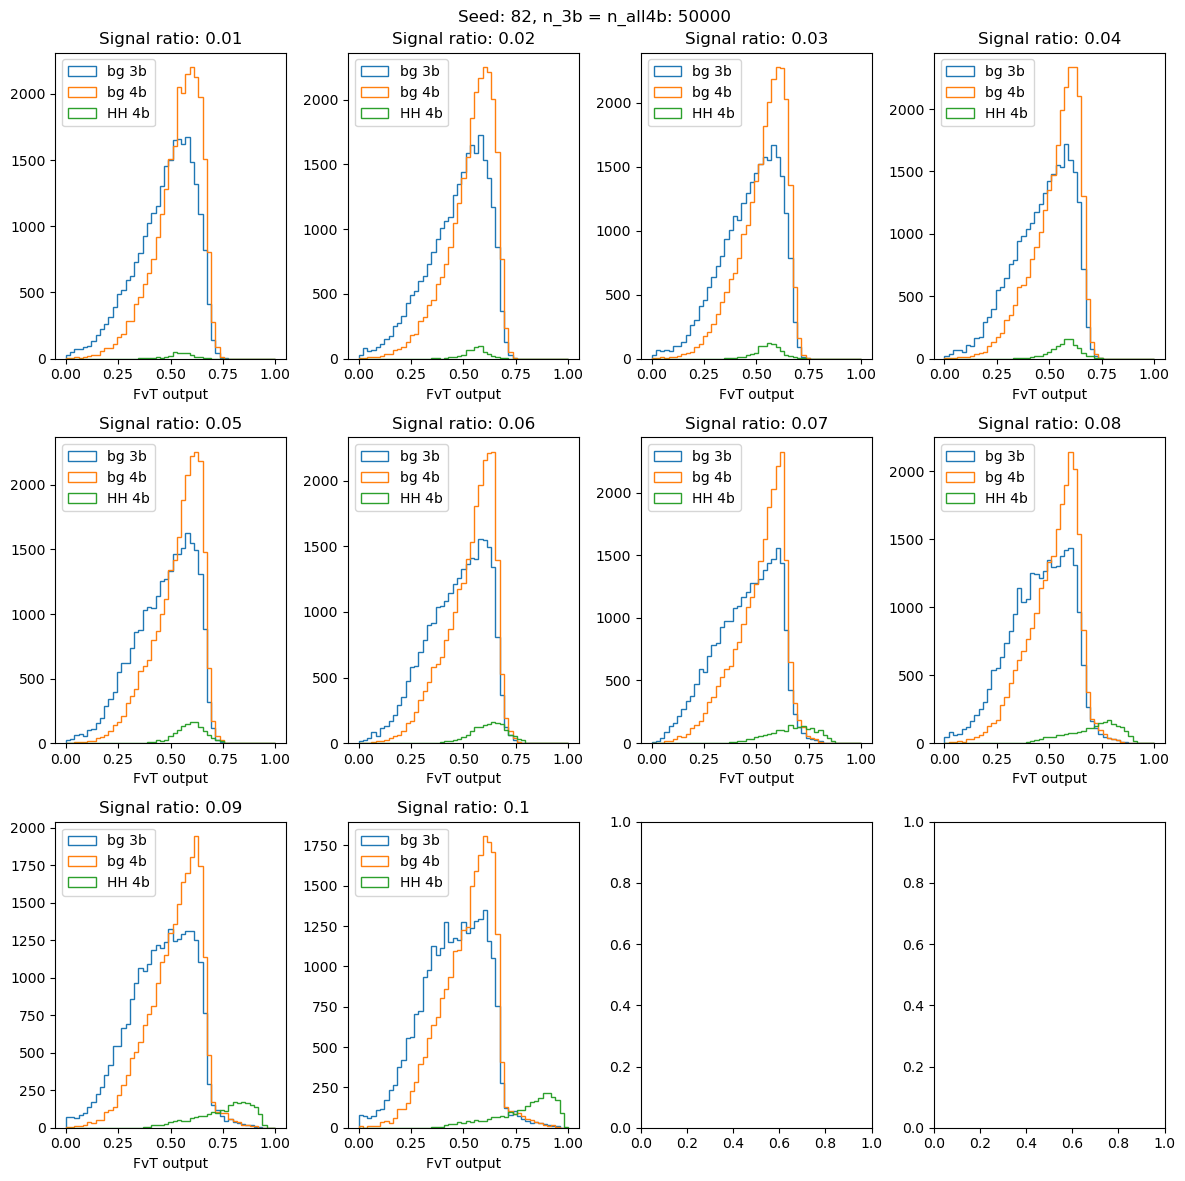

Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82
Seed set to 82


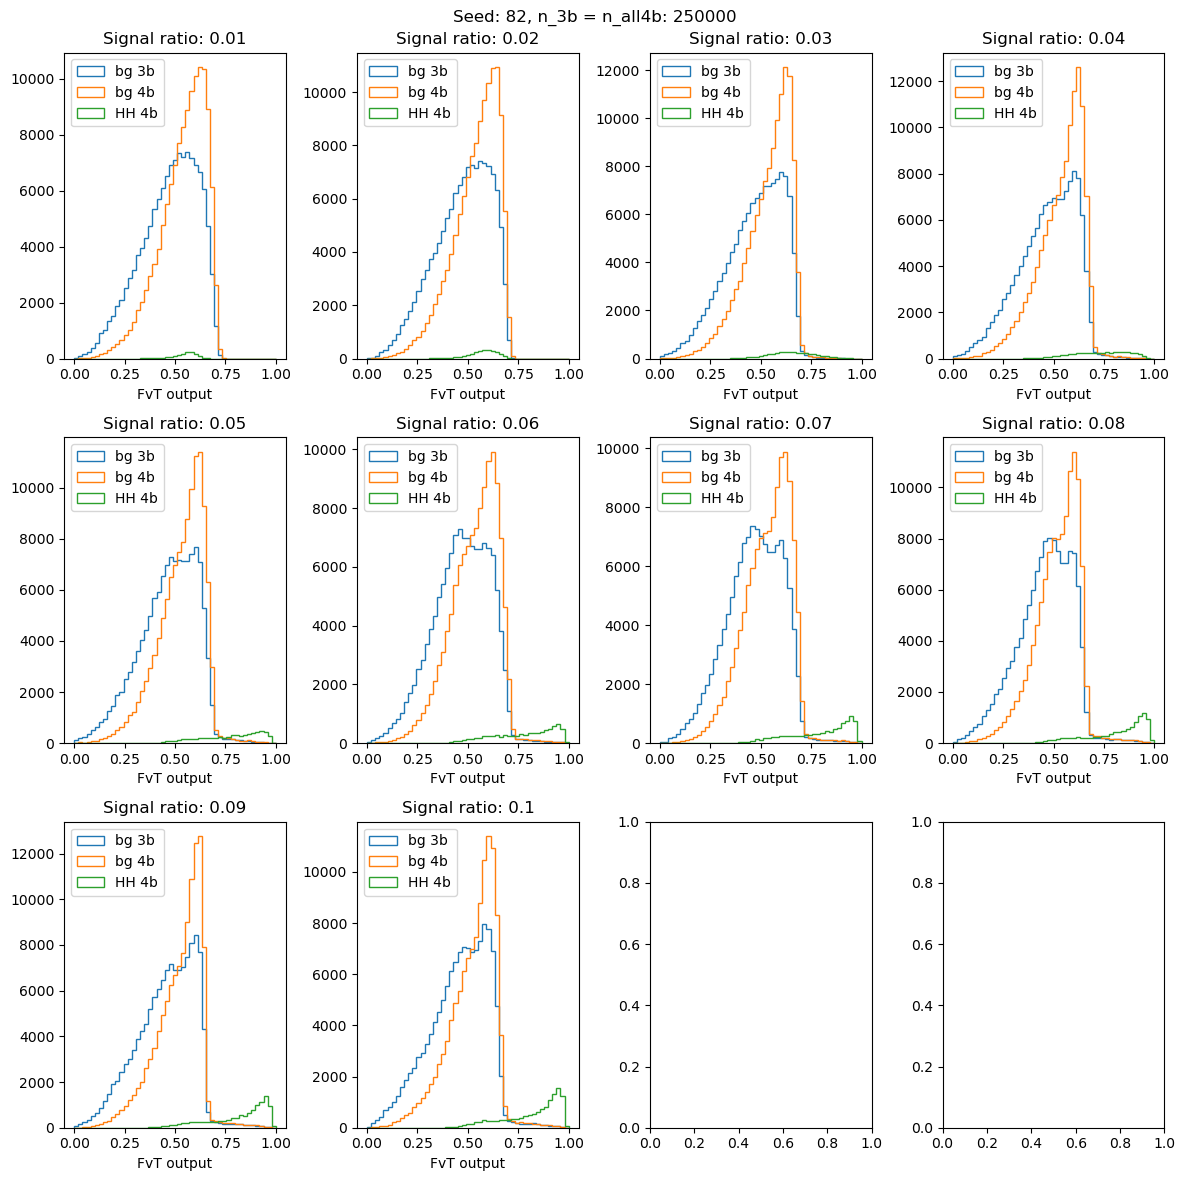

Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92


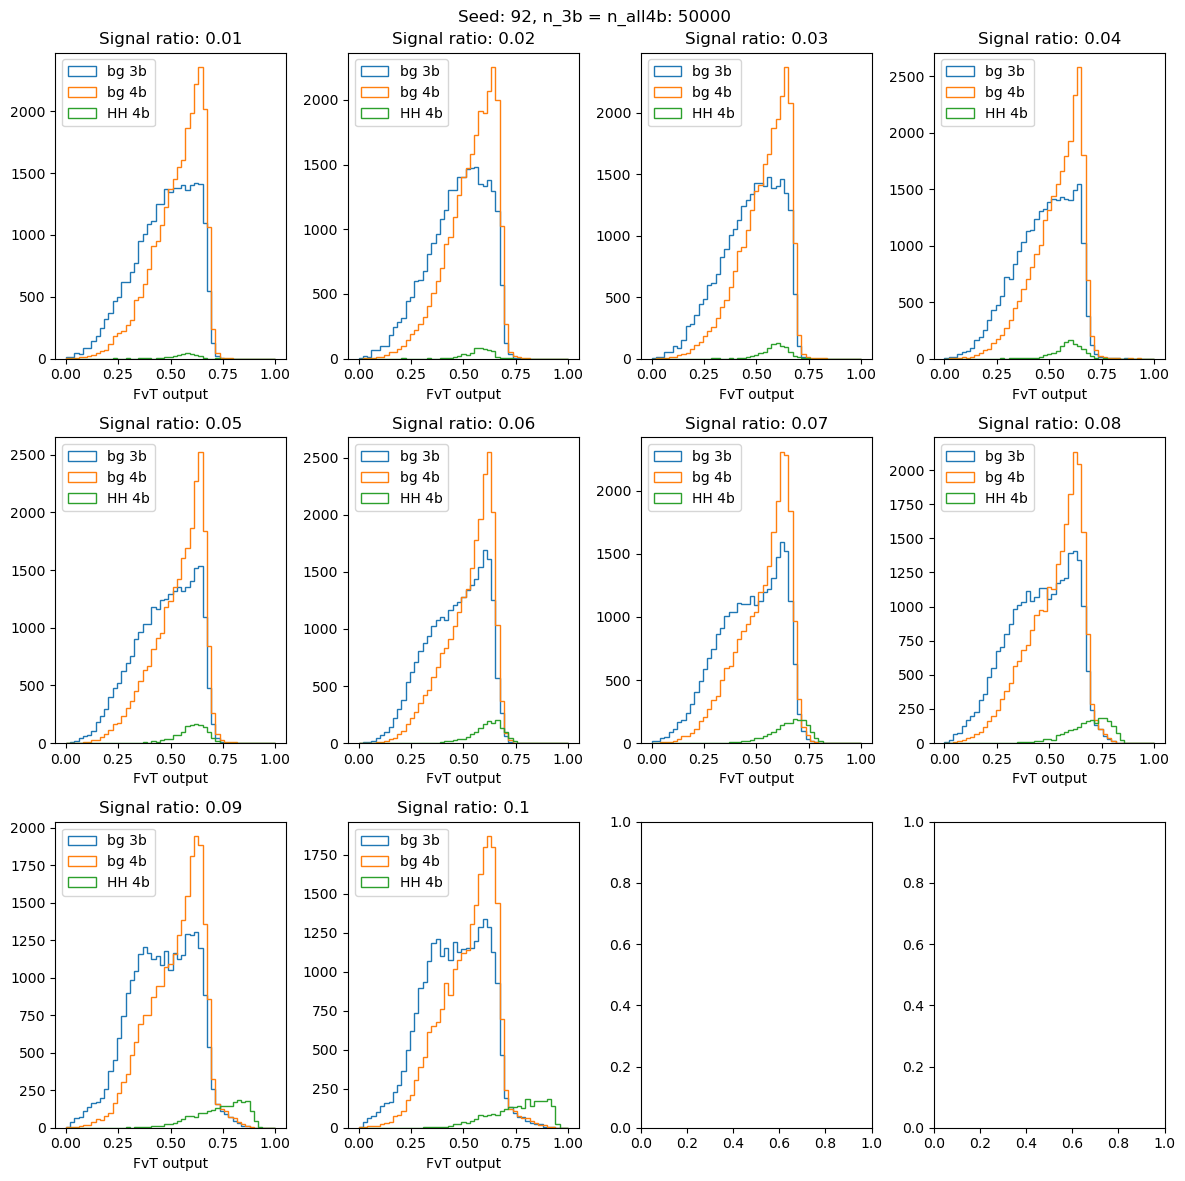

Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92
Seed set to 92


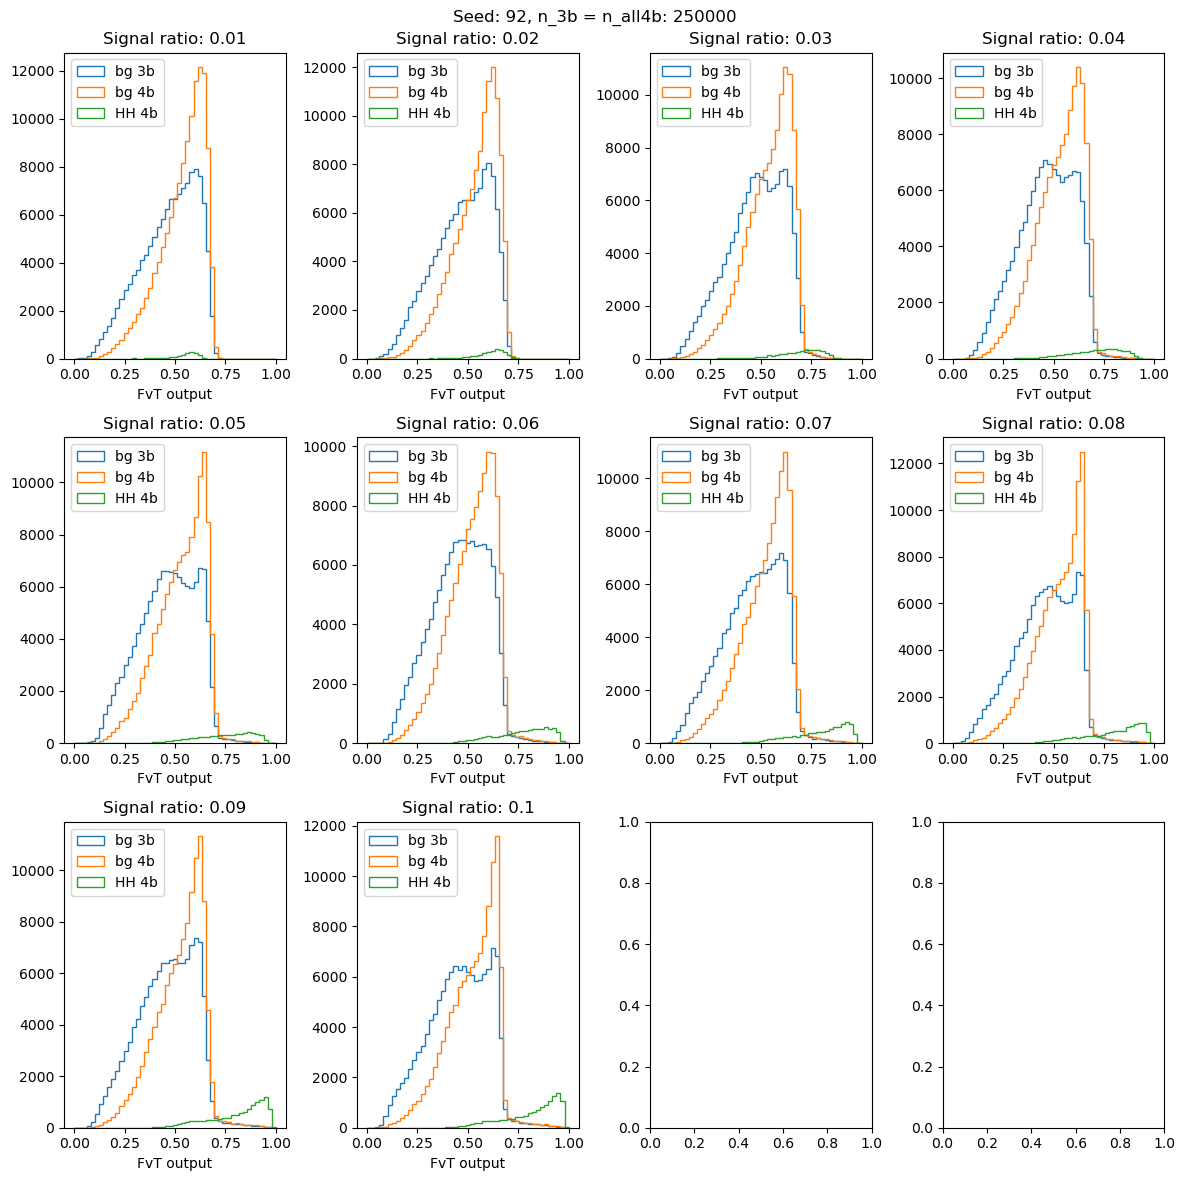

In [19]:
from code_fragments import routine_1, fvt_score_hist

nrows, ncols = 3, 4

for seed in [42, 52, 62, 72, 82, 92]:
    for n_samples in [50000, 250000]:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
        fig.suptitle(f"Seed: {seed}, n_3b = n_all4b: {n_samples}")
        for ax_cnt, signal_ratio in enumerate(np.arange(1, 11) * 0.01):
            current_ax = ax[ax_cnt // ncols, ax_cnt % ncols]
            current_ax.set_title(f"Signal ratio: {signal_ratio}")
            events_test = routine_1(signal_ratio, seed, n_3b=n_samples, n_all4b=n_samples, return_keys=["test"])["test"]
            # fig, ax = fvt_score_hist(events_train)
            # fig.suptitle(f"Signal ratio: {signal_ratio}, Seed: {seed}")
            # plt.show()

            # fig, ax = fvt_score_hist(events_val)
            # fig.suptitle(f"Signal ratio: {signal_ratio}, Seed: {seed}")
            # plt.show()
            fvt_score_hist(events_test, current_ax)

        plt.tight_layout()
        plt.show()
        plt.close()



In [1]:
from code_fragments import routine_1, fvt_score_hist

nrows, ncols = 1, 3

for seed in [42]:
    for n_samples in [50000, 250000, 2000000]:
        fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, 12))
        fig.suptitle(f"Seed: {seed}, n_3b = n_all4b: {n_samples}")
        for ax_cnt, signal_ratio in enumerate([0.01]):
            current_ax = ax[ax_cnt // ncols, ax_cnt % ncols]
            current_ax.set_title(f"Signal ratio: {signal_ratio}")
            events_test = routine_1(signal_ratio, seed, n_3b=n_samples, n_all4b=n_samples, return_keys=["test"])["test"]
            # fig, ax = fvt_score_hist(events_train)
            # fig.suptitle(f"Signal ratio: {signal_ratio}, Seed: {seed}")
            # plt.show()

            # fig, ax = fvt_score_hist(events_val)
            # fig.suptitle(f"Signal ratio: {signal_ratio}, Seed: {seed}")
            # plt.show()
            fvt_score_hist(events_test, current_ax)

        plt.tight_layout()
        plt.show()
        plt.close()



NameError: name 'plt' is not defined

In [20]:
dim = 16
directory = pathlib.Path("../events/MG3")

df_3b_new = pd.read_hdf(directory / "dataframes" / "threeTag_picoAOD.h5")
df_bg4b_new = pd.read_hdf(directory / "dataframes" / "fourTag_10x_picoAOD.h5")
df_hh4b_new = pd.read_hdf(directory / "dataframes" / "HH4b_picoAOD.h5")

df_3b_new["signal"] = False
df_bg4b_new["signal"] = False
df_hh4b_new["signal"] = True



In [21]:
len(df_3b_new), len(df_bg4b_new), len(df_hh4b_new)

(2013103, 2202261, 30856)

In [22]:
df_hh4b_new["weight"].sum() / df_bg4b_new["weight"].sum()

0.014365163